## PROJECT - (15th Jan, 2021 - 31st Jan, 2021) 

In [1385]:
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data

from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential             # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation       # Importing necessary libraries 

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator             # Loading image generator 
from tensorflow import keras         # Loading keras libaray 

 ## PART ONE  // Regressor Model Building

### 1. Import Data.

In [12]:
df = pd.read_csv('Part- 1,2&3 - Signal.csv')

In [13]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [14]:
df.tail()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6

In [15]:
df.shape

(1599, 12)

In [16]:
df.size

19188

In [17]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [18]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.The dataset consists of (1599 entries & 12 columns). 

2.On checking for lapses in the dataset we can conclude by saying  that the data does not have any null values & does not have any major cleaning that needs to be done. 

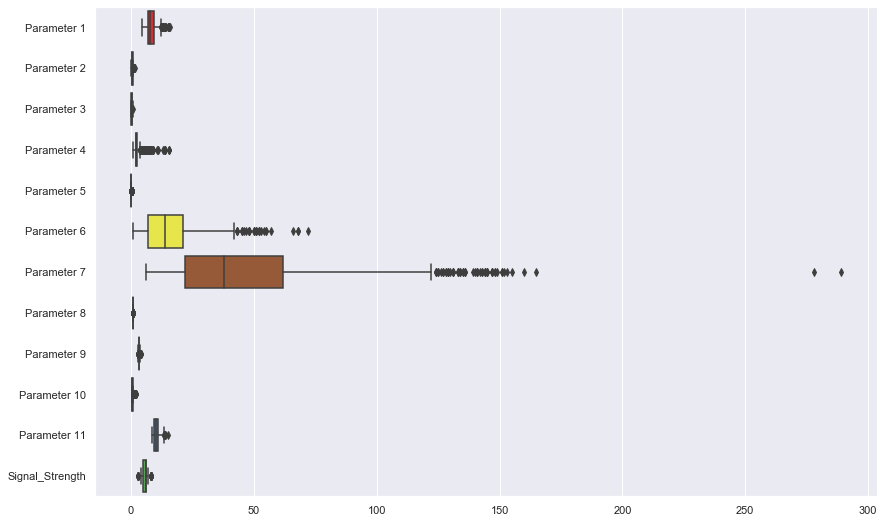

In [20]:
plt.figure(figsize=(14,9))
sns.boxplot(data = df, orient = 'h', palette = 'Set1', dodge = False);

Observation: 

From the above boxplot we can see that there are outliers are present in mostly all columns. I will be finding the outliers counts in individual attributes analysis and fixing the outliers after visualization and analysis of each attribute.


###  2. Data Analysis & Visualisation.

### Analysing each attribute with the help of plots.

### A. Parameter 1

Text(0.5, 0, 'Parameter 1')

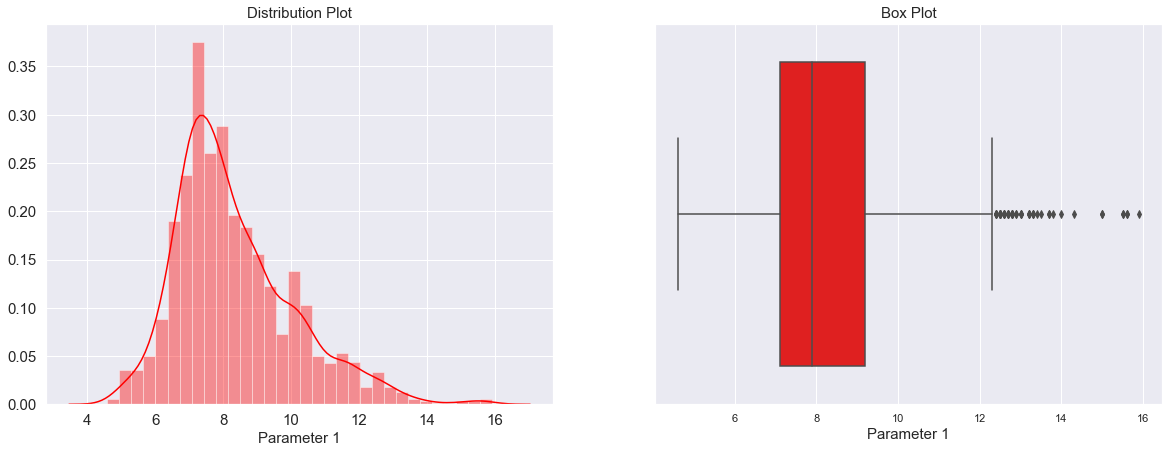

In [21]:
# Plotting a visual analysis of parameter 1

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 1'], ax = ax1, color = 'red')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 1', fontsize = 15)

sns.boxplot(df['Parameter 1'], ax = ax2, color = 'red')
ax2.set_title('Box Plot', fontsize = 15)
ax2.set_xlabel('Parameter 1', fontsize = 15)

In [22]:
# Checking outliers in parameter 1 

outliers_cols0 = []

Q1 = df['Parameter 1'].quantile(0.25)    # 1st Quartile
Q3 = df['Parameter 1'].quantile(0.75)    # 3rd Quartile

IQR = Q3 - Q1         # Interquartile range

LTV_para1 = Q1 - 1.5 * IQR               # Lower range bound
UTV_para1 = Q3 + 1.5 * IQR               # Upper range bound 


print('Interquartile range =', IQR)
print('Parameter 1 <', LTV_para1, 'and >', UTV_para1, 'are outliers')
print('Number of outliers in parameter 1 column below the lower whisker =', df[df['Parameter 1'] < (Q1 - (1.5*IQR))]['Parameter 1'].count())
print('Number of outliers in parameter 1 column above the upper whisker =', df[df['Parameter 1'] > (Q3 + (1.5*IQR))]['Parameter 1'].count())

outliers_cols0.append('Parameter 1')
upperLowerBound_Disct = {'Parameter 1' : UTV_para1}

Interquartile range = 2.0999999999999996
Parameter 1 < 3.95 and > 12.349999999999998 are outliers
Number of outliers in parameter 1 column below the lower whisker = 0
Number of outliers in parameter 1 column above the upper whisker = 49


Observation :

We can observe from the outlier analysis above that we have a total of 49 outliers in "Parameter 1" which is towards the upper whisker. We will treat them later on.

### B. Parameter 2

Text(0.5, 0, 'Parameter 2')

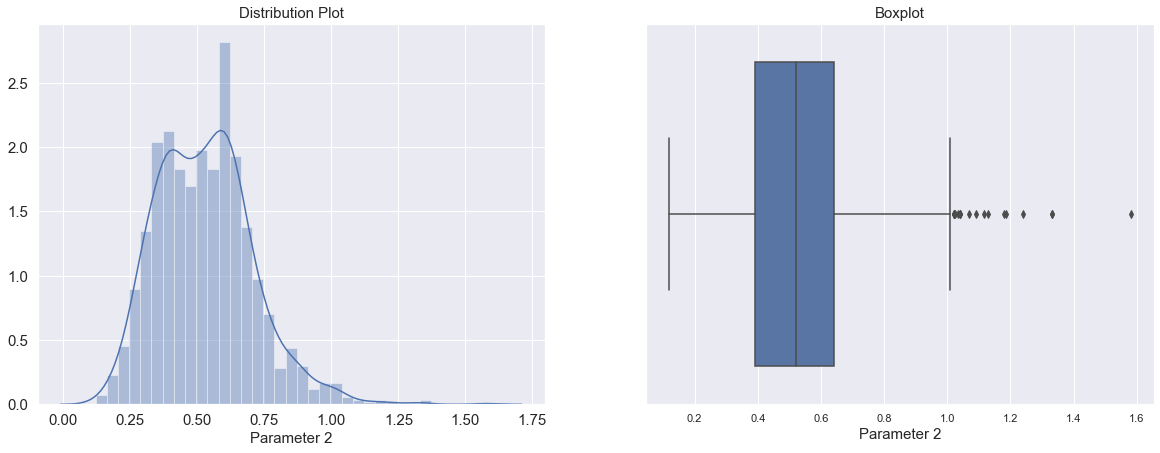

In [23]:
# Plotting a visual analysis of parameter 2

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 2'], ax = ax1, color = 'b')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 2', fontsize = 15)

sns.boxplot(df['Parameter 2'], ax = ax2, color = 'b')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 2', fontsize = 15)

In [24]:
# Checking outliers in parameter 2

outliers_cols1 = []

Q1 = df['Parameter 2'].quantile(0.25)    # 1st Quartile
Q3 = df['Parameter 2'].quantile(0.75)    # 3rd Quartile

IQR = Q3 - Q1         # Interquartile range

LTV_para2 = Q1 - 1.5 * IQR               # Lower range bound
UTV_para2 = Q3 + 1.5 * IQR               # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 2 <', LTV_para2, 'and >', UTV_para2, 'are outliers')
print('Number of outliers in the parameter 2 column below the lower whisker =', df[df['Parameter 2'] < (Q1 - (1.5*IQR))]['Parameter 2'].count())
print('Number of outliers in the parameter 2 column above the upper whisker =', df[df['Parameter 2'] > (Q3 + (1.5*IQR))]['Parameter 2'].count())

outliers_cols1.append('Parameter 2')
upperLowerBound_Disct = {'Parameter 2' : UTV_para2}

Interquartile range = 0.25
Parameter 2 < 0.015000000000000013 and > 1.0150000000000001 are outliers
Number of outliers in the parameter 2 column below the lower whisker = 0
Number of outliers in the parameter 2 column above the upper whisker = 19


Observation :

We can observe from the outlier analysis above that we have a total of 19 outliers in "Parameter 2" which is towards the upper whisker. We will treat them later on.

### C. Parameter 3

Text(0.5, 0, 'Parameter 3')

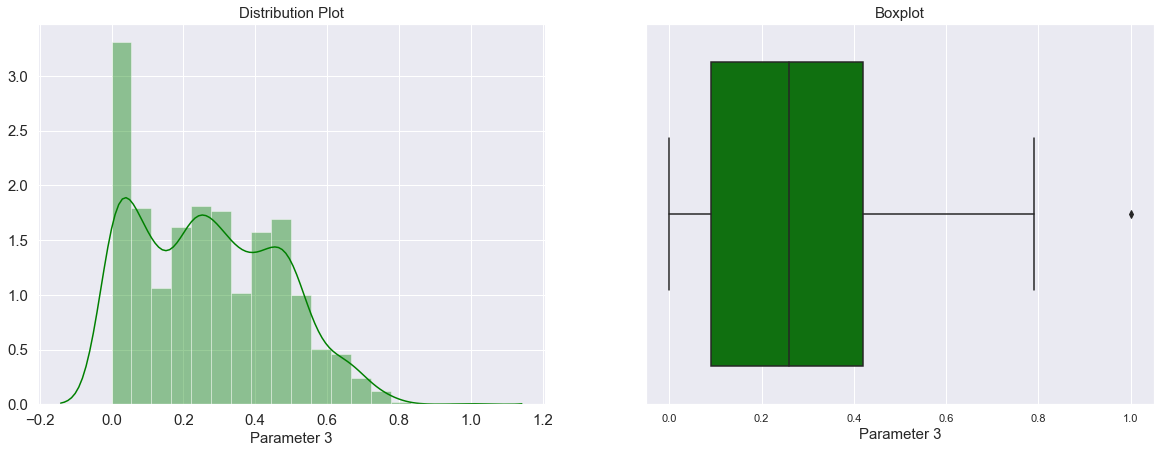

In [25]:
# Plotting a visual analysis of parameter 3

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 3'], ax = ax1, color = 'green')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 3', fontsize = 15)

sns.boxplot(df['Parameter 3'], ax = ax2, color = 'green')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 3', fontsize = 15)

In [26]:
# Checking outliers in parameter 3

outliers_cols2 = []

Q1 = df['Parameter 3'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 3'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para3 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para3 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 3 <', LTV_para3, 'and >', UTV_para3, 'are outliers')
print('Number of outliers in the parameter 3 column below the lower whisker =', df[df['Parameter 3'] < (Q1 - (1.5*IQR))]['Parameter 3'].count())
print('Number of outliers in the parameter 3 column above the upper whisker =', df[df['Parameter 3'] > (Q3 + (1.5*IQR))]['Parameter 3'].count())

outliers_cols2.append('Parameter 3')
upperLowerBound_Disct = {'Parameter 3' : UTV_para3}

Interquartile range =  0.32999999999999996
Parameter 3 < -0.4049999999999999 and > 0.9149999999999999 are outliers
Number of outliers in the parameter 3 column below the lower whisker = 0
Number of outliers in the parameter 3 column above the upper whisker = 1


Observation :

We can observe from the outlier analysis above that we have a total of 1 outlier in "Parameter 3" which is towards the upper whisker. We will treat them later on.

### D. Parameter 4

Text(0.5, 0, 'Parameter 4')

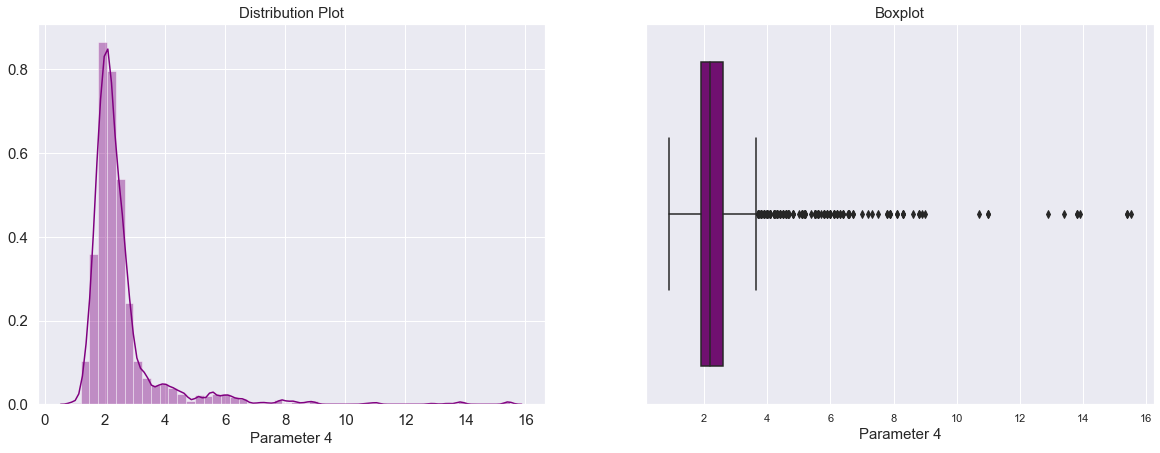

In [27]:
# Plotting a visual analysis of parameter 4

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 4'], ax = ax1, color = 'purple')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 4', fontsize = 15)

sns.boxplot(df['Parameter 4'], ax = ax2, color = 'purple')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 4', fontsize = 15)

In [28]:
# Checking outliers in parameter 4

outliers_cols3 = []

Q1 = df['Parameter 4'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 4'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para4 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para4 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 4 <', LTV_para4, 'and >', UTV_para4, 'are outliers')
print('Number of outliers in the parameter 4 column below the lower whisker =', df[df['Parameter 4'] < (Q1 - (1.5*IQR))]['Parameter 4'].count())
print('Number of outliers in the parameter 4 column above the upper whisker =', df[df['Parameter 4'] > (Q3 + (1.5*IQR))]['Parameter 4'].count())

outliers_cols3.append('Parameter 4')
upperLowerBound_Disct = {'Parameter 4' : UTV_para4}

Interquartile range =  0.7000000000000002
Parameter 4 < 0.8499999999999996 and > 3.6500000000000004 are outliers
Number of outliers in the parameter 4 column below the lower whisker = 0
Number of outliers in the parameter 4 column above the upper whisker = 155


Observation :

We can observe from the outlier analysis above that we have a total of 155 outliers in "Parameter 4" which is towards the upper whisker. We will treat them later on.

### E. Parameter 5

Text(0.5, 0, 'Parameter 5')

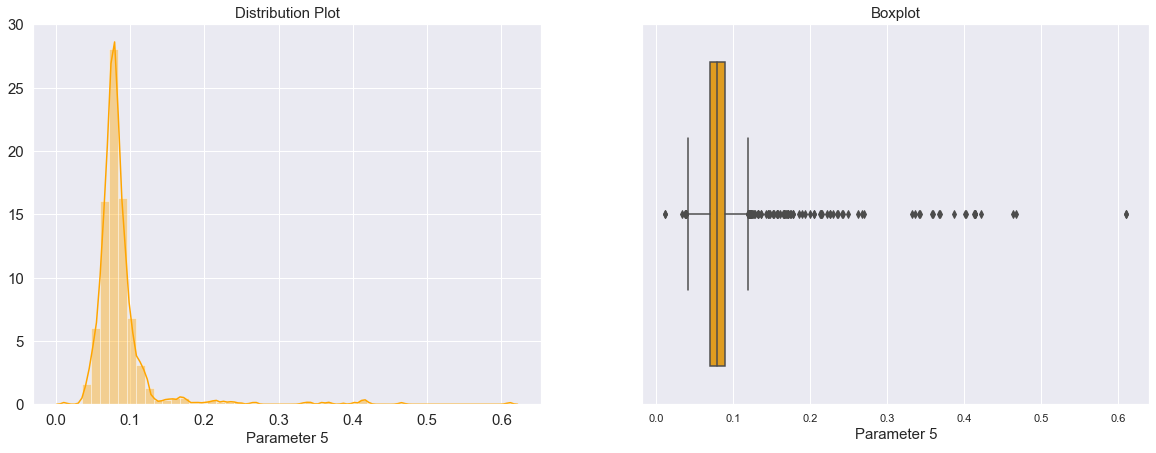

In [29]:
# Plotting a visual analysis of parameter 5

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 5'], ax = ax1, color = 'orange')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 5', fontsize = 15)

sns.boxplot(df['Parameter 5'], ax = ax2, color = 'orange')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 5', fontsize = 15)

In [30]:
# Checking outliers in parameter 5

outliers_cols4 = []

Q1 = df['Parameter 5'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 5'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para5 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para5 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 5 <', LTV_para5, 'and >', UTV_para5, 'are outliers')
print('Number of outliers in the parameter 5 column below the lower whisker =', df[df['Parameter 5'] < (Q1 - (1.5*IQR))]['Parameter 5'].count())
print('Number of outliers in the parameter 5 column above the upper whisker =', df[df['Parameter 5'] > (Q3 + (1.5*IQR))]['Parameter 5'].count())

outliers_cols4.append('Parameter 5')
upperLowerBound_Disct = {'Parameter 5' : UTV_para5}

Interquartile range =  0.01999999999999999
Parameter 5 < 0.04000000000000002 and > 0.11999999999999998 are outliers
Number of outliers in the parameter 5 column below the lower whisker = 9
Number of outliers in the parameter 5 column above the upper whisker = 103


Observation :

We can observe from the outlier analysis above that we have a total of 112 outlier in "Parameter 5", 9 towards the lower whisker and 103 towards the upper whisker. We will treat them later on.

### F. Parameter 6

Text(0.5, 0, 'Parameter 6')

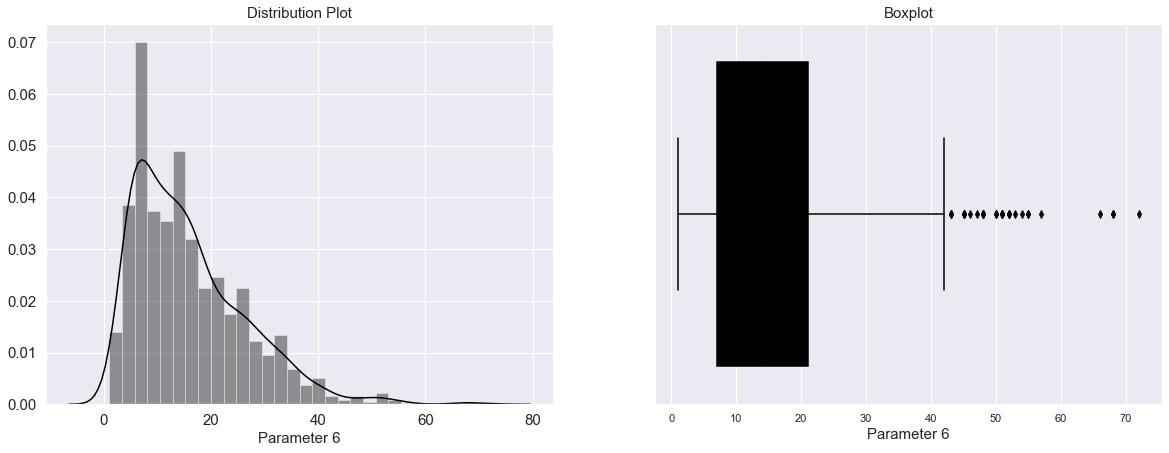

In [31]:
# Plotting a visual analysis of parameter 6

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 6'], ax = ax1, color = 'black')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 6', fontsize = 15)

sns.boxplot(df['Parameter 6'], ax = ax2, color = 'black')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 6', fontsize = 15)

In [32]:
# Checking outliers in parameter 6

outliers_cols5 = []

Q1 = df['Parameter 6'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 6'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1          #Interquartile range

LTV_para6 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para6 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 6 <', LTV_para6, ' and >', UTV_para6, 'are outliers')
print('Number of outliers in the parameter 6 column below the lower whisker =', df[df['Parameter 6'] < (Q1 - (1.5*IQR))]['Parameter 6'].count())
print('Number of outliers in the parameter 6 column above the upper whisker =', df[df['Parameter 6'] > (Q3 + (1.5*IQR))]['Parameter 6'].count())

outliers_cols5.append('Parameter 6')
upperLowerBand_Disct = {'Parameter 6' : UTV_para6}

Interquartile range = 14.0
Parameter 6 < -14.0  and > 42.0 are outliers
Number of outliers in the parameter 6 column below the lower whisker = 0
Number of outliers in the parameter 6 column above the upper whisker = 30


Observation :

We can observe from the outlier analysis above that we have a total of 30 outliers in "Parameter 6" which is towards the upper whisker. We will treat them later on.

### G. Parameter 7

Text(0.5, 0, 'Parameter 7')

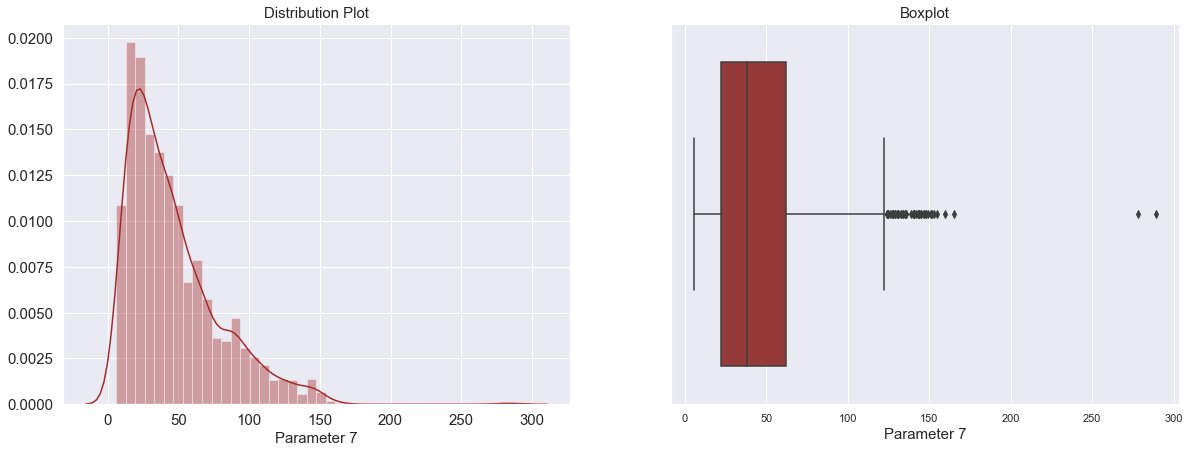

In [33]:
# Plotting a visual analysis of parameter 7

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 7'], ax = ax1, color = 'brown')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 7', fontsize = 15)

sns.boxplot(df['Parameter 7'], ax = ax2, color = 'brown')
ax2.set_title('Boxplot', fontsize= 15)
ax2.set_xlabel('Parameter 7', fontsize = 15)

In [34]:
# Checking outliers in parameter 7

outliers_cols6 = []

Q1 = df['Parameter 7'].quantile(0.25)      # 1st quartile
Q3 = df['Parameter 7'].quantile(0.75)      # 3rd quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para7 = Q1 - 1.5 * IQR                 # Lower range bound
UTV_para7 = Q3 + 1.5 * IQR                 # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 7 <', LTV_para7, 'and >', UTV_para7, 'are outliers')
print('Number of outliers in the parameter 7 column below the lower whisker =', df[df['Parameter 7'] < (Q1 - (1.5*IQR))]['Parameter 7'].count())
print('Number of outliers in the parameter 7 column above the upper whisker =', df[df['Parameter 7'] > (Q3 + (1.5*IQR))]['Parameter 7'].count())

outliers_cols6.append('Parameter 7')
upperLowerBound_Disct = {'Parameter 7' : UTV_para7}

Interquartile range = 40.0
Parameter 7 < -38.0 and > 122.0 are outliers
Number of outliers in the parameter 7 column below the lower whisker = 0
Number of outliers in the parameter 7 column above the upper whisker = 55


Observation :

We can observe from the outlier analysis above that we have a total of 55 outliers in "Parameter 6" which is towards the upper whisker. We will treat them later on.

### H. Parameter 8

Text(0.5, 0, 'Parameter 8')

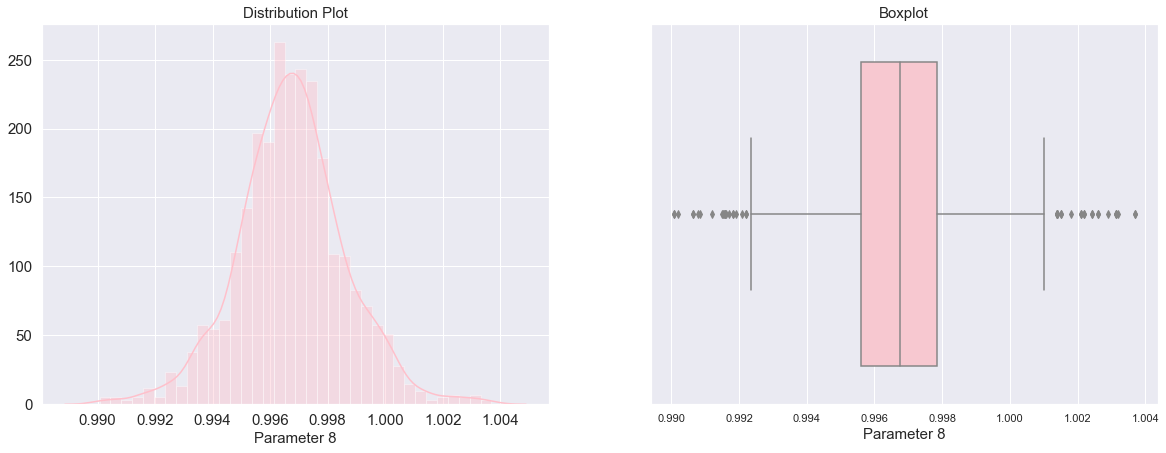

In [35]:
# Plotting a visual analysis of parameter 8

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 8'], ax = ax1, color = 'pink')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 8', fontsize = 15)

sns.boxplot(df['Parameter 8'], ax = ax2, color = 'pink')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 8', fontsize = 15)

In [36]:
# Checking outliers in parameter 8

outliers_cols7 = []

Q1 = df['Parameter 8'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 8'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para8 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para8 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 8 <', LTV_para8, 'and >', UTV_para8, 'are outliers')
print('Number of outliers in the parameter 8 column below the lower whisker =', df[df['Parameter 8'] < (Q1 - (1.5*IQR))]['Parameter 8'].count())
print('Number of outliers in the parameter 8 column below the upper whisker =', df[df['Parameter 8'] > (Q3 + (1.5*IQR))]['Parameter 8'].count())

outliers_cols7.append('Parameter 8')
upperLowerBound_Disct = {'Parameter 8' : UTV_para8}

Interquartile range = 0.002234999999999876
Parameter 8 < 0.9922475000000002 and > 1.0011874999999997 are outliers
Number of outliers in the parameter 8 column below the lower whisker = 21
Number of outliers in the parameter 8 column below the upper whisker = 24


Observation :

We can observe from the outlier analysis above that we have a total of 45 outlier in "Parameter 8", 21 towards the lower whisker and 24 towards the upper whisker. We will treat them later on.

### I. Parameter 9

Text(0.5, 0, 'Parameter 9')

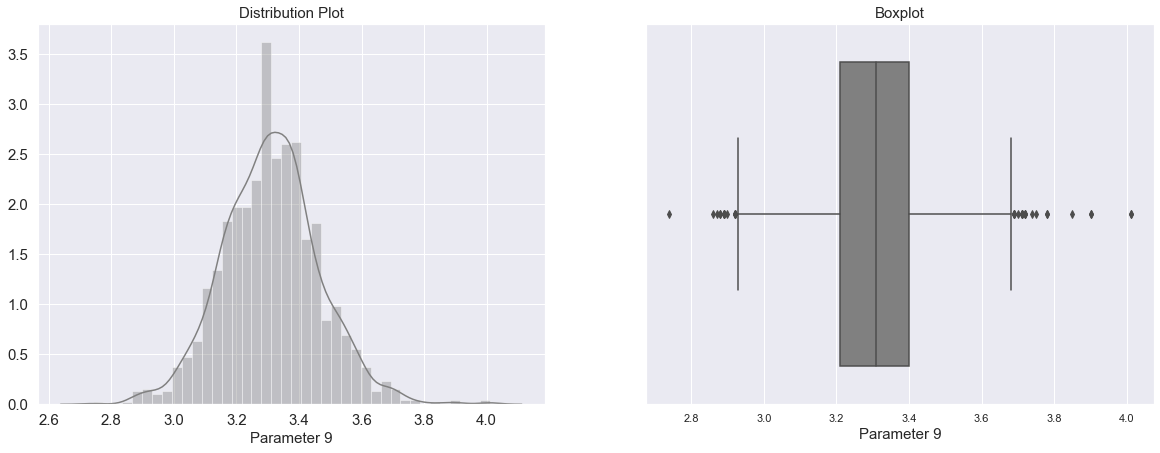

In [37]:
# Plotting a visual analysis of parameter 9

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 9'], ax = ax1, color = 'grey')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 9', fontsize = 15)

sns.boxplot(df['Parameter 9'], ax = ax2, color = 'grey')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 9', fontsize = 15)

In [38]:
# Checking outliers in parameter 9

outliers_cols8 = []

Q1 = df['Parameter 9'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 9'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para9 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para9 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 9 <', LTV_para9, 'and >', UTV_para9, 'are outliers')
print('Number of outliers in the parameter 9 column below the lower whisker =', df[df['Parameter 9'] < (Q1 - (1.5*IQR))]['Parameter 9'].count())
print('Number of outliers in the parameter 9 column below the upper whisker =', df[df['Parameter 9'] > (Q3 + (1.5*IQR))]['Parameter 9'].count())

outliers_cols8.append('Parameter 9')
upperLowerBound_Disct = {'Parameter 9' : UTV_para9}

Interquartile range = 0.18999999999999995
Parameter 9 < 2.925 and > 3.6849999999999996 are outliers
Number of outliers in the parameter 9 column below the lower whisker = 14
Number of outliers in the parameter 9 column below the upper whisker = 21


Observation :

We can observe from the outlier analysis above that we have a total of 35 outlier in "Parameter 9", 14 towards the lower whisker and 21 towards the upper whisker. We will treat them later on.

### J. Parameter 10

Text(0.5, 0, 'Parameter 10')

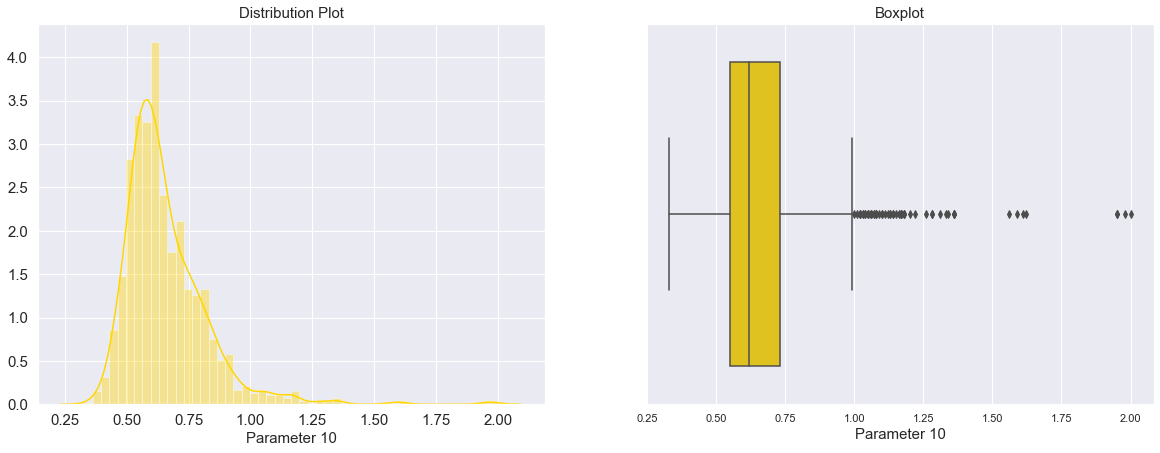

In [39]:
# Plotting a visual analysis of parameter 10

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 10'], ax = ax1, color = 'gold')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 10', fontsize = 15)

sns.boxplot(df['Parameter 10'], ax = ax2, color = 'gold')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 10', fontsize = 15)

In [40]:
# Checking outliers in parameter 10

outliers_cols9 = []

Q1 = df['Parameter 10'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 10'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para10 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para10 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 10 <', LTV_para10, 'and >', UTV_para10, 'are outliers')
print('Number of outliers in the parameter 10 column below the lower whisker =', df[df['Parameter 10'] < (Q1 - (1.5*IQR))]['Parameter 10'].count())
print('Number of outliers in the parameter 10 column below the upper whisker =', df[df['Parameter 10'] > (Q3 + (1.5*IQR))]['Parameter 10'].count())

outliers_cols9.append('Parameter 10')
upperLowerBound_Disct = {'Parameter 10' : UTV_para10}

Interquartile range = 0.17999999999999994
Parameter 10 < 0.28000000000000014 and > 0.9999999999999999 are outliers
Number of outliers in the parameter 10 column below the lower whisker = 0
Number of outliers in the parameter 10 column below the upper whisker = 59


Observation :

We can observe from the outlier analysis above that we have a total of 59 outliers in "Parameter 10" which is towards the upper whisker. We will treat them later on.

### K. Parameter 11

Text(0.5, 0, 'Parameter 11')

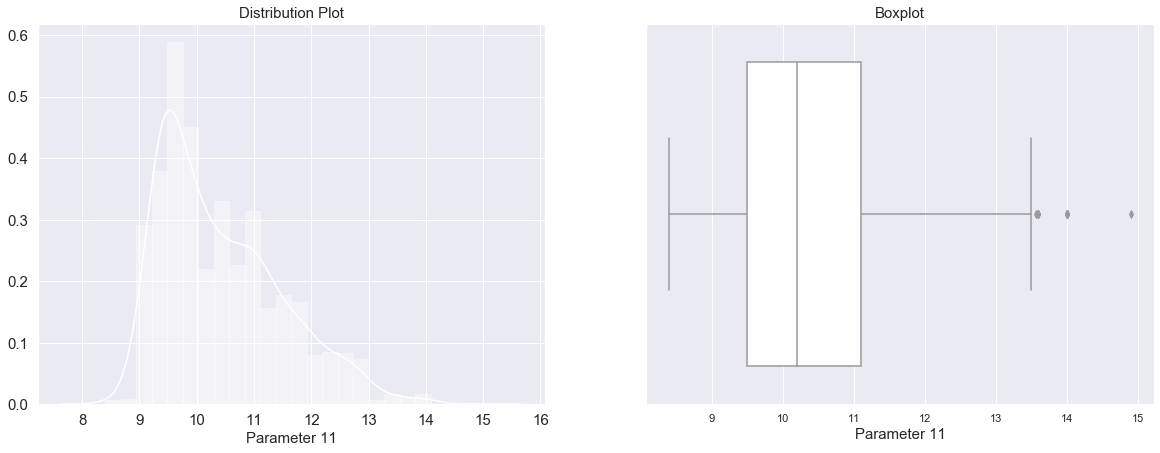

In [41]:
# Plotting a visual analysis of parameter 11

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 11'], ax = ax1, color = 'white')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 11', fontsize = 15)

sns.boxplot(df['Parameter 11'], ax = ax2, color = 'white')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 11', fontsize = 15)

In [42]:
# Checking outliers in parameter 11

outliers_cols10 = []

Q1 = df['Parameter 11'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 11'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para11 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para11 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 11 <', LTV_para11, 'and >', UTV_para11, 'are outliers')
print('Number of outliers in the parameter 11 column below the lower whisker =', df[df['Parameter 11'] < (Q1 - (1.5*IQR))]['Parameter 11'].count())
print('Number of outliers in the parameter 11 column below the upper whisker =', df[df['Parameter 11'] > (Q3 + (1.5*IQR))]['Parameter 11'].count())

outliers_cols10.append('Parameter 11')
upperLowerBound_Disct = {'Parameter 11' : UTV_para11}

Interquartile range = 1.5999999999999996
Parameter 11 < 7.1000000000000005 and > 13.5 are outliers
Number of outliers in the parameter 11 column below the lower whisker = 0
Number of outliers in the parameter 11 column below the upper whisker = 13


Observation :

We can observe from the outlier analysis above that we have a total of 13 outliers in "Parameter 11" which is towards the upper whisker. We will treat them later on.

### L. Signal_Strength

Text(0.5, 0, 'Signal_Strength')

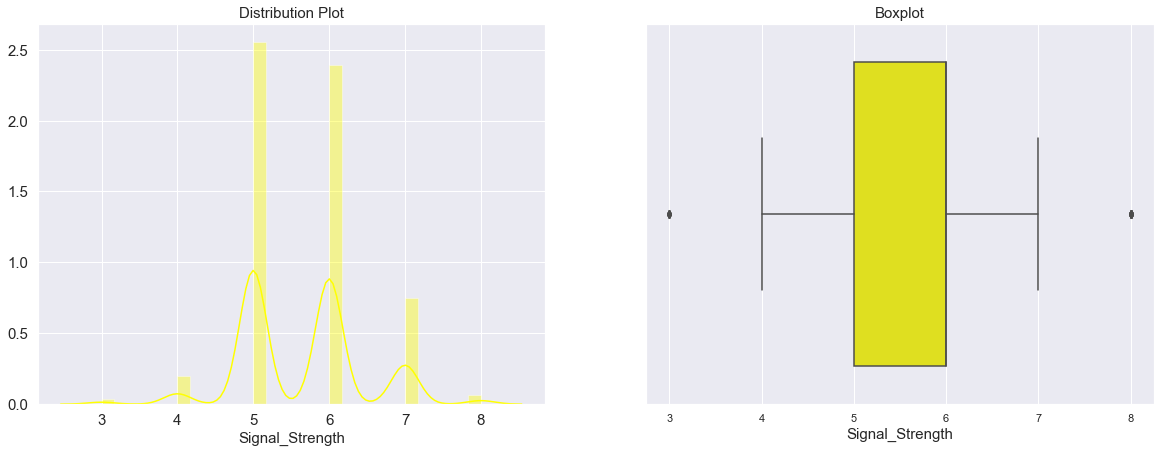

In [43]:
# Plotting a visual analysis of signal_strength

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Signal_Strength'], ax = ax1, color = 'yellow')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Signal_Strength', fontsize = 15)

sns.boxplot(df['Signal_Strength'], ax = ax2, color = 'yellow')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Signal_Strength', fontsize = 15)

In [44]:
# Checking outliers in signal_strength

outliers_cols11 = []

Q1 = df['Signal_Strength'].quantile(0.25)     # 1st quartile
Q3 = df['Signal_Strength'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para12 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para12 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Signal_Strength <', LTV_para12, 'and >', UTV_para12, 'are outliers')
print('Number of outliers in the Signal_Strength column below the lower whisker =', df[df['Signal_Strength'] < (Q1 - (1.5*IQR))]['Signal_Strength'].count())
print('Number of outliers in the Signal_Strength column below the upper whisker =', df[df['Signal_Strength'] > (Q3 + (1.5*IQR))]['Signal_Strength'].count())

outliers_cols11.append('Signal_Strength')
upperLowerBound_Disct = {'Signal_Strength' : UTV_para12}

Interquartile range = 1.0
Signal_Strength < 3.5 and > 7.5 are outliers
Number of outliers in the Signal_Strength column below the lower whisker = 10
Number of outliers in the Signal_Strength column below the upper whisker = 18


Observation :

We can observe from the outlier analysis above that we have a total of 28 outlier in "Signal_Strength", 10 towards the lower whisker and 18 towards the upper whisker. We will treat them later on.

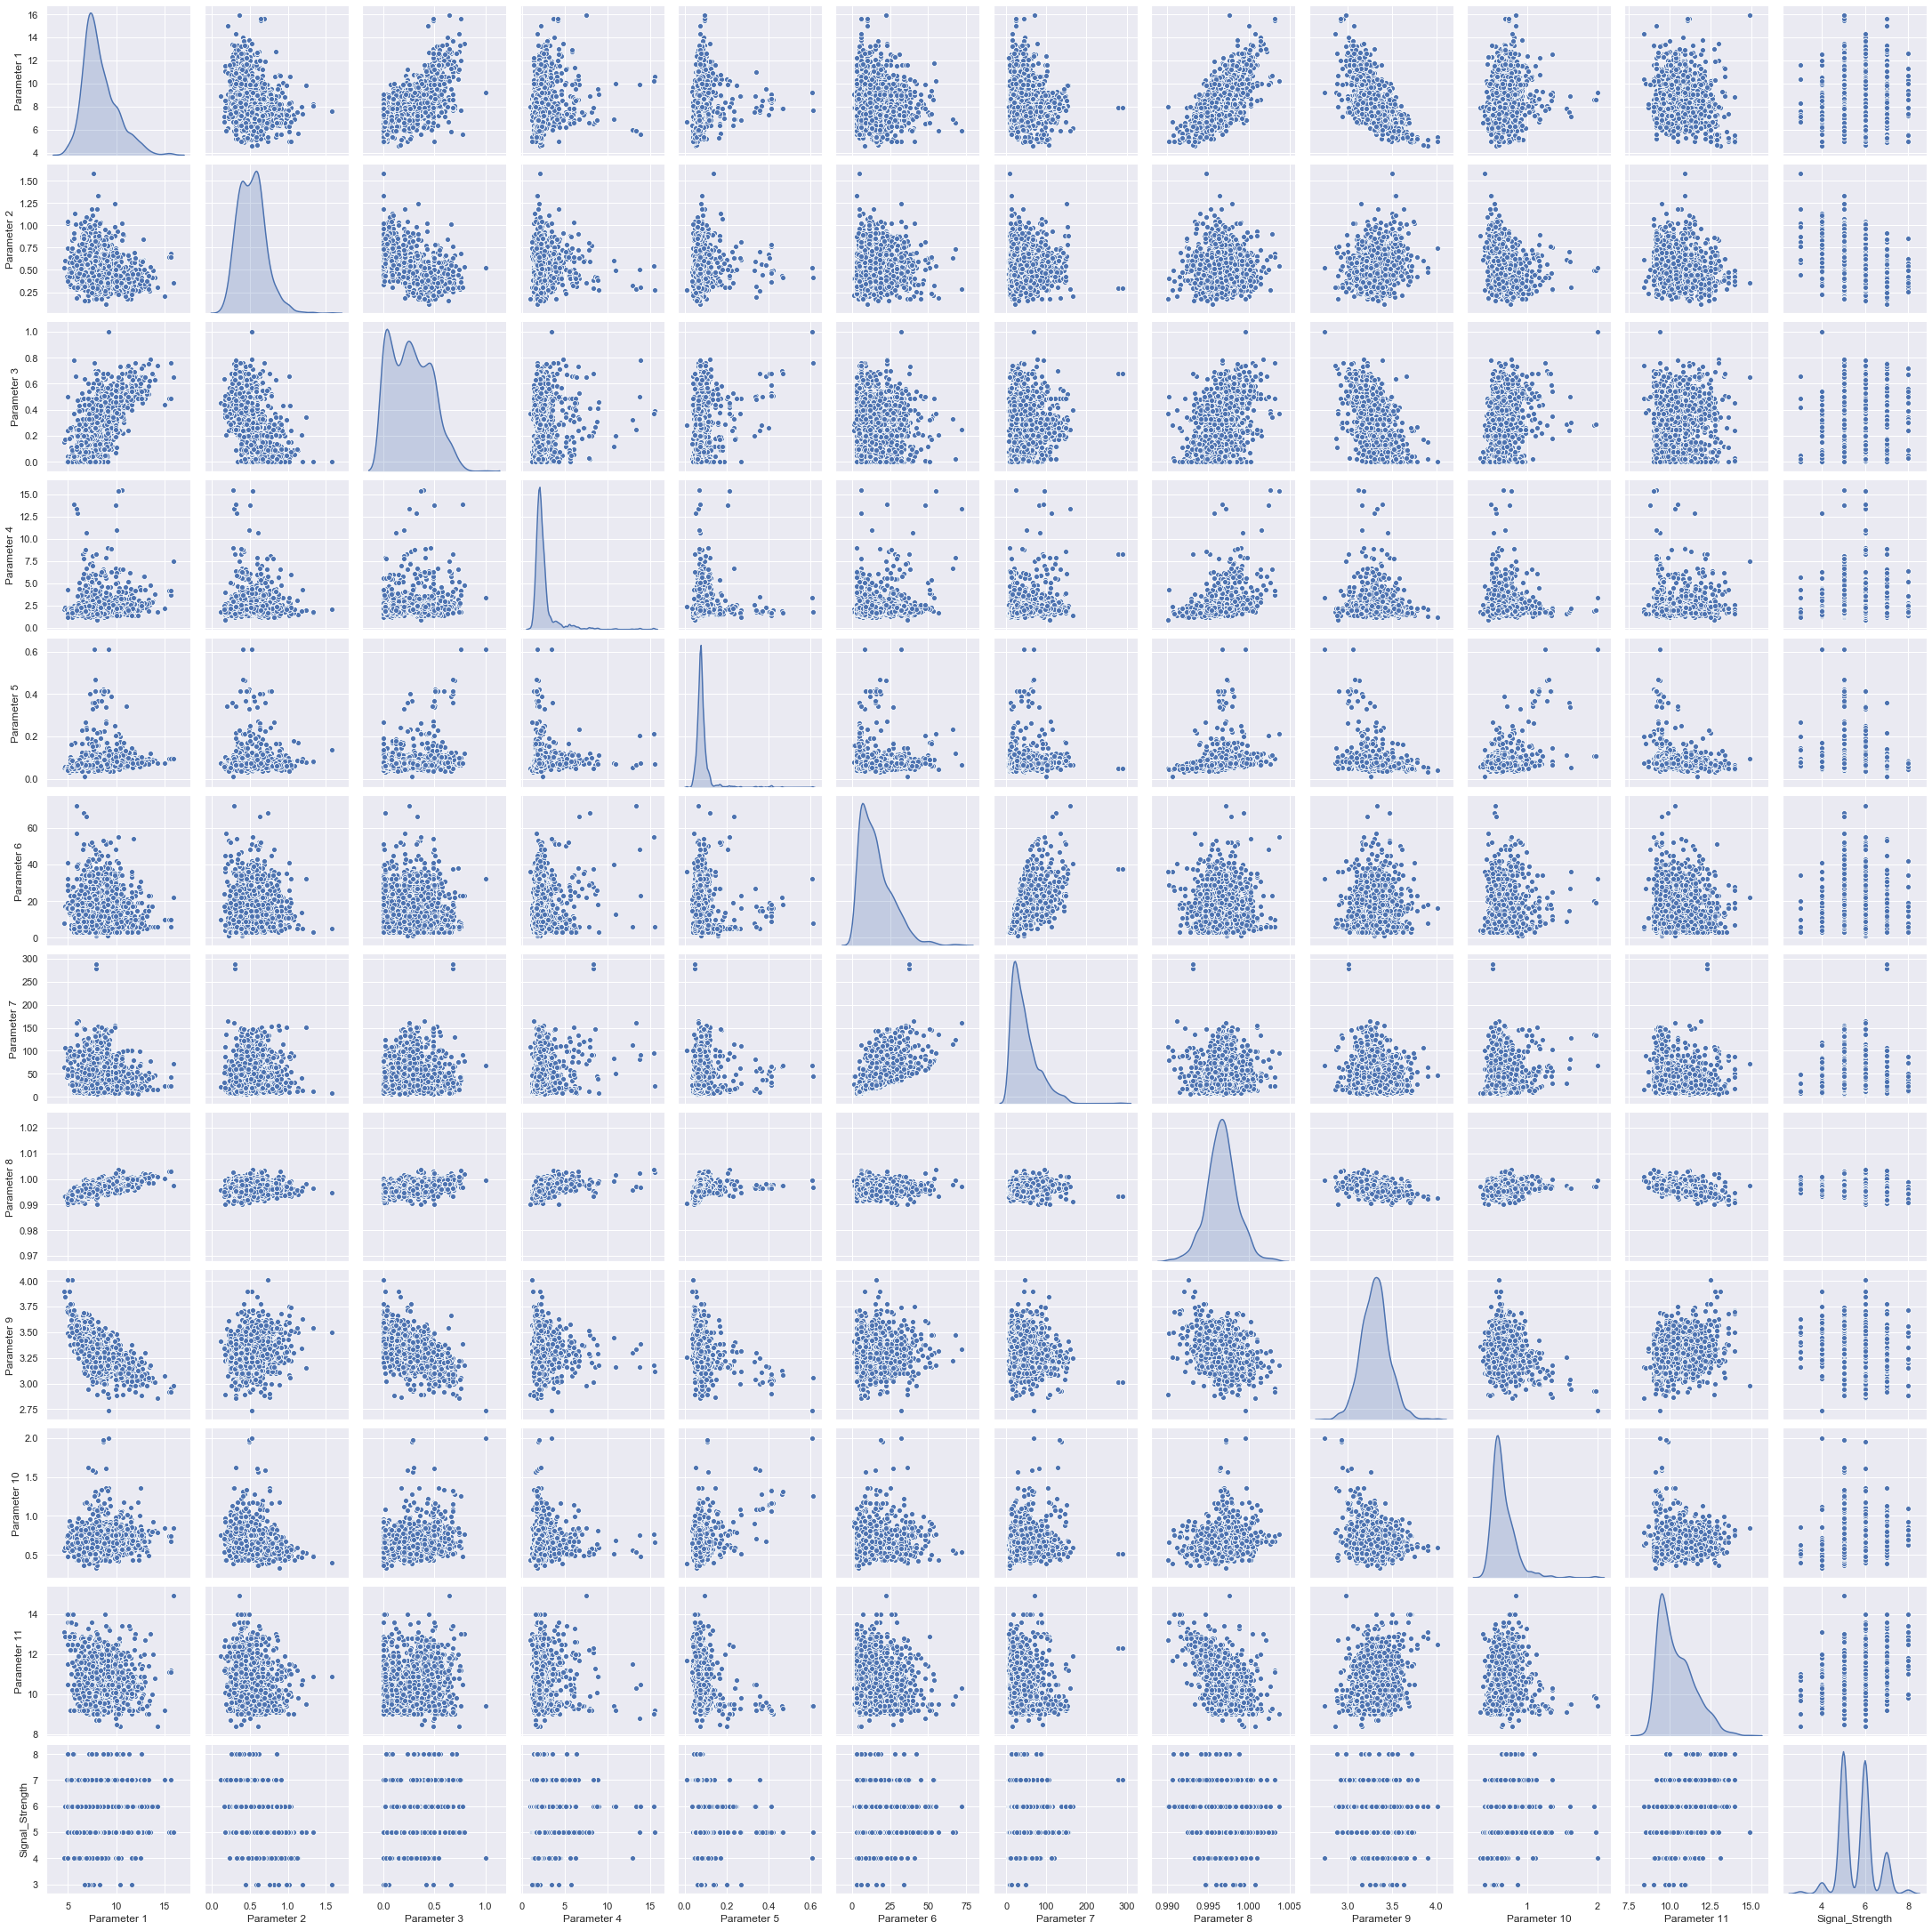

In [45]:
# Pairplot visual analysis to check correlation amongst different fields

sns.pairplot(df, diag_kind = 'kde');

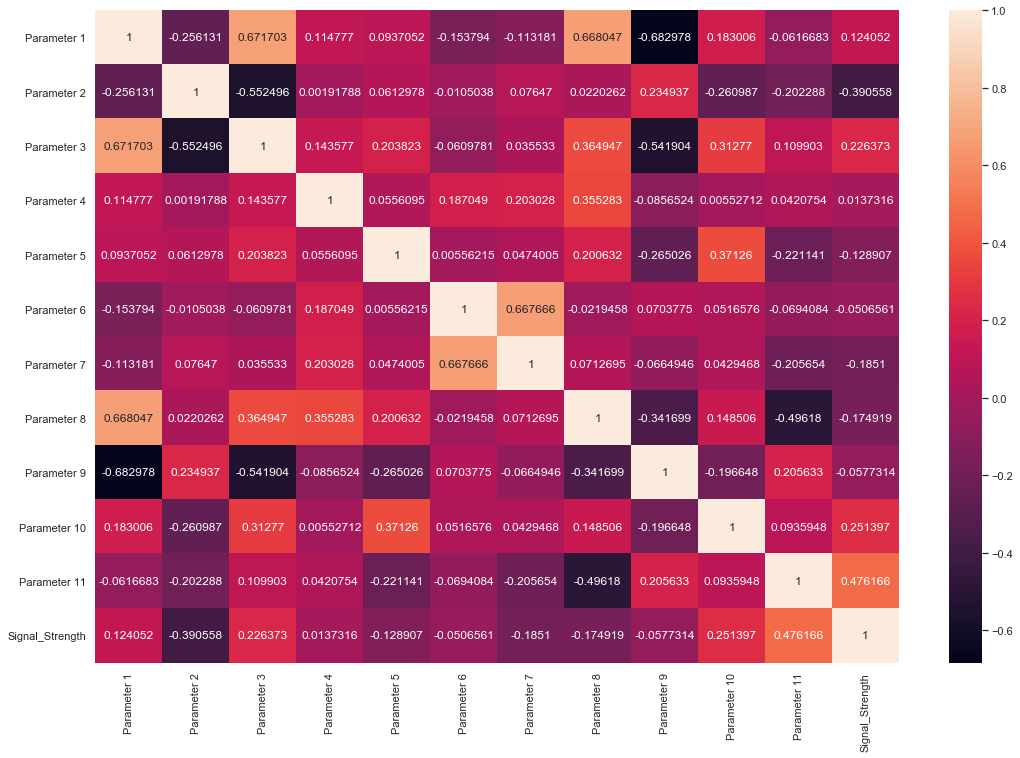

In [46]:
df.corr()

plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, fmt = 'g');

Observation : From the above pair plot & heatmap we can infer the relationship amongst the attributes and target column as follows:

1. We have some strong negative correlations between (Parameter 1 & Parameter 9) (-0.68), (Parameter 3 & Parameter 9) (-0.54), (Parameter 2 & Parameter 3) (-0.55), (Parameter 8 & Parameter 11) (-0.49), 


2. Signal_Strength have some positive linear relation with (Parameter 11 that means if the quality of Parameter 11 goes up Signal_Strength will be more).


3. We also have positive correlations between (Parameter 1 & Parameter 3) (0.67), (Parameter 1 & Parameter 8) (0.66), (Parameter 7 & Parameter 6) (0.66).


4. Also it is quite visible that there are multiple gaussians in Parameter 3.


5. Rest of the relations between other individual attributes are mostly cloud shaped or symmetrical shaped.

### Pick one strategy to address the presence outliers and missing values and perform necessary imputation

------------------------ Fixing Outliers ------------------------

- As we have seen above outlier are present in the given dataset.


- There are multiple ways to deal with outliers but I mostly prefer either to drop the outliers or repalce it with median/mean.


- Here I am going to replace the outliers with median because if we drop them, there may be chance to loose some important information which we dont want to as it could hamper our overall anylysis.

In [47]:
# Showing the columns where outliers exist

print('These are the columns which have outliers : \n\n', outliers_cols0, outliers_cols1, outliers_cols3, outliers_cols4, outliers_cols5, outliers_cols6, outliers_cols7, outliers_cols8, outliers_cols9, outliers_cols10, outliers_cols11)

These are the columns which have outliers : 

 ['Parameter 1'] ['Parameter 2'] ['Parameter 4'] ['Parameter 5'] ['Parameter 6'] ['Parameter 7'] ['Parameter 8'] ['Parameter 9'] ['Parameter 10'] ['Parameter 11'] ['Signal_Strength']


In [48]:
df_new = df.copy()

In [49]:
# Treating outliers present in respective columns

for col_name in df_new.columns[:]:
    q1 = df_new[col_name].quantile(0.25)
    q3 = df_new[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    
    df_new.loc[(df_new[col_name] < low) | (df_new[col_name] > high), col_name] = df_new[col_name].median()

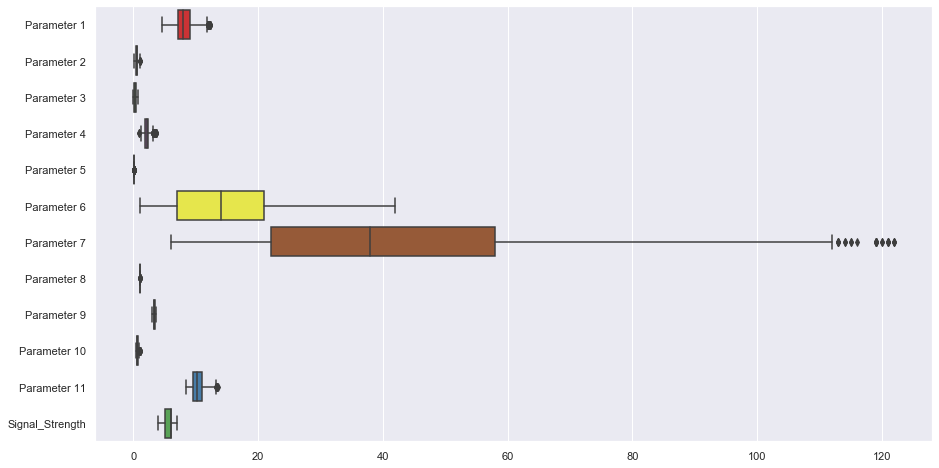

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_new, orient='h', palette='Set1', dodge=False);

Observation :

Now we can see from the above visual analysis of boxplots that most of the outliers are replaced with their median. We can see that most of the outliers are removed, but because of their gaussians replacing it with median values, the attributes raised with new outliers which we can ignore.

In [51]:
df_new.shape

(1599, 12)

In [52]:
df_new.size

19188

In [53]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4              5.0  
1           9.8              5.0  
2           9.8              5.0  
3           9.8              6.0  
4           9.4              5.0

In [54]:
df_new.count(axis = 0)

Parameter 1        1599
Parameter 2        1599
Parameter 3        1599
Parameter 4        1599
Parameter 5        1599
Parameter 6        1599
Parameter 7        1599
Parameter 8        1599
Parameter 9        1599
Parameter 10       1599
Parameter 11       1599
Signal_Strength    1599
dtype: int64

### Feature Engineering Techniques

### Creating Composite Features, ( "Parameter 2,3,9,10" ratio by dividing the values of "Parameter 9 with 2,3,10" )

In [55]:
df_new.insert(df_new.shape[-1]-1,'Parameter 2,3,9 & 10',df_new['Parameter 9']/(df_new['Parameter 2'] + df_new['Parameter 3'] + df_new['Parameter 10']))

In [56]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10  Signal_Strength  
0           9.4              2.785714              5.0  
1           9.8              2.051282              5.0  
2           9.8              2.248276              5.0  
3           9.8              2.225352              6.0  
4           9.4              2.785714              5.0

### Creating Composite Features, ( "Parameter 1 & 11" ratio by dividing the values of "Parameter 11 with 1" )

In [57]:
df_new.insert(df_new.shape[-1]-1, 'Parameter 1 & 11', df_new['Parameter 11']/df_new['Parameter 1'])

In [58]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11  Signal_Strength  
0           9.4              2.785714           1.27027              5.0  
1           9.8              2.051282           1.25641              5.0  
2           9.8              2.248276           1.25641              5.0  
3           9.8              2.225352           0.87500              6.0  
4           9.4              2.785714           1.27027              5.0

### Creating Composite Features, ( "Parameter 4,5 & 8" ratio by dividing the values of "Parameter 4 with 5, 8" )

In [59]:
df_new.insert(df_new.shape[-1]-1,'Parameter 4,5 & 8',df_new['Parameter 4']/(df_new['Parameter 8'] + df_new['Parameter 5']))

In [60]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11  Parameter 4,5 & 8  \
0           9.4              2.785714           1.27027           1.769417   
1           9.8              2.051282           1.25641           2.374863   
2           9.8              2.248276           1.25641           2.112029   
3           9.8              2.225352           0.87500           1.770736   
4           9.4              2.785714           1.27027           1.769417   

   Signal_Strength  
0              5.0  
1              5.0  
2              5.0  
3              6.0  
4              5.0

In [61]:
df_new.shape

(1599, 15)

In [62]:
df_new.isnull().sum()

Parameter 1             0
Parameter 2             0
Parameter 3             0
Parameter 4             0
Parameter 5             0
Parameter 6             0
Parameter 7             0
Parameter 8             0
Parameter 9             0
Parameter 10            0
Parameter 11            0
Parameter 2,3,9 & 10    0
Parameter 1 & 11        0
Parameter 4,5 & 8       0
Signal_Strength         0
dtype: int64

In [63]:
df_new = df_new.apply(zscore)
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0    -0.506257     1.084072    -1.395226    -0.660402    -0.193503   
1    -0.237876     2.171450    -1.395226     0.980050     1.341692   
2    -0.237876     1.446531    -1.188918     0.276999     0.923002   
3     2.043366    -1.453143     1.493090    -0.660402    -0.263285   
4    -0.506257     1.084072    -1.395226    -0.660402    -0.193503   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0    -0.455657    -0.329932     0.648369     1.448448     -0.638601   
1     1.076386     0.903736     0.039563    -0.783248      0.372245   
2    -0.017931     0.417746     0.161324    -0.351307      0.119534   
3     0.200933     0.642049     0.770130    -1.071209     -0.470127   
4    -0.455657    -0.329932     0.648369     1.448448     -0.638601   

   Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11  Parameter 4,5 & 8  \
0     -0.976125              1.066110         -0.167079          -0.661503   
1     -0.582843             -0.829895         -0.215210           0.889886   
2     -0.582843             -0.321337         -0.215210           0.216403   
3     -0.582843             -0.380517         -1.539705          -0.658123   
4     -0.976125              1.066110         -0.167079          -0.661503   

   Signal_Strength  
0        -0.854340  
1        -0.854340  
2        -0.854340  
3         0.496886  
4        -0.854340

### Splitting X-independent attributes and Y-dependent attributes and keeping the test set seperate

In [64]:
x = df_new.drop(['Signal_Strength'], axis = 1)
y = df_new[['Signal_Strength']]

In [65]:
pca_model = PCA(n_components = 14)
pca_model.fit(x)
plt.step(list(range(1,15)), np.cumsum(pca_model.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cummulation of Variance Explained')
plt.xlabel('Eigen Values')
plt.show()
np.cumsum(pca_model.explained_variance_ratio_)

array([0.30192231, 0.45883703, 0.59756174, 0.70665676, 0.77984946,
       0.83966866, 0.89180671, 0.92629421, 0.95673865, 0.98038117,
       0.99702532, 0.99891844, 0.99999315, 1.        ])

In [66]:
cluster = range(1,10)
mean_distortions = []
for val in cluster:
    kmeans = KMeans(n_clusters = val)
    kmeans.fit(df_new)
    mean_distortions.append(sum(np.min(cdist(df_new, kmeans.cluster_centers_), axis = 1))/df_new.shape[0])

Text(0.5, 1.0, 'Elbow Method')

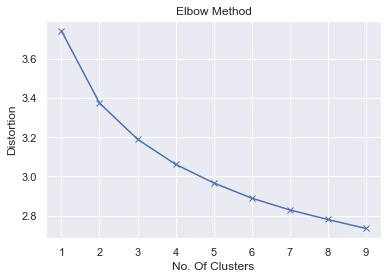

In [67]:
plt.plot(cluster, mean_distortions,'bx-')
plt.xlabel('No. Of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')

In [68]:
X_train1, X_test1, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)      # Splitting Data

In [69]:
from sklearn.preprocessing import StandardScaler          # Importing standard scaler library

X_train_sd = StandardScaler().fit_transform(X_train1)
X_test_sd = StandardScaler().fit_transform(X_test1)

In [70]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00093458e+00 -2.32410251e-01  5.99138340e-01  1.81366779e-01
   2.00770241e-01 -1.38106617e-01 -1.17948996e-01  5.45473970e-01
  -5.96016295e-01  1.51494592e-01 -4.07013904e-02 -5.60151049e-01
  -8.30272450e-01  1.65313015e-01]
 [-2.32410251e-01  1.00093458e+00 -5.59814698e-01  1.07922524e-02
   1.59415350e-01 -8.04582955e-03  8.01717410e-02 -6.46099117e-03
   1.90831513e-01 -3.16557532e-01 -2.20440731e-01 -4.42435372e-02
   7.51556530e-02  6.40629135e-04]
 [ 5.99138340e-01 -5.59814698e-01  1.00093458e+00  1.63410088e-01
   1.04595515e-01 -6.17874488e-02  6.47931774e-03  3.53543851e-01
  -5.06249440e-01  2.58523442e-01  1.32810983e-01 -6.73142800e-01
  -4.22172072e-01  1.55926053e-01]
 [ 1.81366779e-01  1.07922524e-02  1.63410088e-01  1.00093458e+00
   1.92466826e-01  1.45692815e-02  9.29586456e-02  3.59678476e-01
  -5.43814621e-02  5.42385359e-02  1.15811577e-01 -1.99847489e-01
  -1.06104282e-01  9.98448173e-01]
 [ 2.00770241e-01  1.59415350e-01  1.04595515e

In [71]:
# The "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.41552882  44.78392973  59.16711025  70.22353598  77.52517611
  83.67351172  88.90823116  92.46080752  95.64198355  97.8876928
  99.69103678  99.89132599  99.99935178 100.        ]


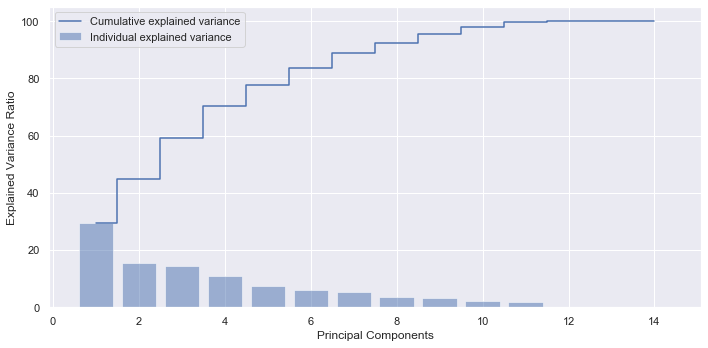

In [72]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Observation :

We can notice through pca that 11 parameters explain 95%-97% of the data.
    

In [73]:
# Values of eigen pairs

eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:14]

[(4.122022794950574,
  array([-0.42110437,  0.11723389, -0.3640538 , -0.19650516, -0.18598969,
          0.0462487 , -0.01563347, -0.35776549,  0.33586247, -0.12603527,
          0.1021161 ,  0.37027407,  0.40356049, -0.18364662])),
 (2.1535869471343827,
  array([ 0.08224526, -0.39969077,  0.28791009, -0.10111066, -0.2960532 ,
         -0.22906666, -0.3361945 , -0.24665309, -0.04597588,  0.35542731,
          0.48734998, -0.1382096 ,  0.18687519, -0.08004576])),
 (2.015527184177692,
  array([ 0.1280791 , -0.01759079,  0.0204929 , -0.61290101,  0.00716183,
         -0.1190304 , -0.12307615, -0.03847032, -0.20245863, -0.10574859,
         -0.27994017,  0.00551274, -0.24459705, -0.62126854])),
 (1.5493462377287603,
  array([-0.06841393, -0.26133366,  0.18856233, -0.15151859, -0.13552072,
          0.63986044,  0.58567289, -0.04972744, -0.03088081,  0.24418302,
         -0.00628622, -0.0949427 ,  0.06853185, -0.14459807])),
 (1.0231849727991564,
  array([ 0.1116671 , -0.55945841,  0.146556

In [74]:
# Generating dimensionally reduced datasets

w = np.hstack((eigen_pairs[0][1].reshape(14,1), 
                      eigen_pairs[1][1].reshape(14,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[-0.42110437  0.08224526]
 [ 0.11723389 -0.39969077]
 [-0.3640538   0.28791009]
 [-0.19650516 -0.10111066]
 [-0.18598969 -0.2960532 ]
 [ 0.0462487  -0.22906666]
 [-0.01563347 -0.3361945 ]
 [-0.35776549 -0.24665309]
 [ 0.33586247 -0.04597588]
 [-0.12603527  0.35542731]
 [ 0.1021161   0.48734998]
 [ 0.37027407 -0.1382096 ]
 [ 0.40356049  0.18687519]
 [-0.18364662 -0.08004576]]


In [75]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((1071, 14), (14, 2), (1071, 2), (528, 2))

In [76]:
X_sd_pca, X_train_sd

(array([[-2.37577805,  0.11579088],
        [ 3.07041545,  0.53924261],
        [ 1.65303526, -2.31916528],
        ...,
        [ 1.08962381, -2.34631815],
        [ 1.24284746,  3.83430216],
        [ 3.85828245,  3.25440715]]),
 array([[-1.67185350e-01, -1.06169860e+00,  1.13839302e+00, ...,
         -1.05859058e+00, -3.01152034e-03,  9.95481094e-01],
        [-9.87286922e-01,  1.35318727e+00, -1.33018202e+00, ...,
          5.74394620e-01,  2.06699217e+00,  5.44003432e-01],
        [-1.05562872e+00,  6.28721512e-01, -1.38161067e+00, ...,
          1.53948068e+00,  4.25416116e-01, -8.93267766e-03],
        ...,
        [-6.45577934e-01,  5.68349365e-01, -1.07303879e+00, ...,
          1.31642642e+00,  7.40397212e-03,  1.25794613e+00],
        [-1.67185350e-01, -1.96728080e+00,  4.18391970e-01, ...,
          2.31736429e-01,  6.58678589e-01, -1.03844031e+00],
        [-1.60236310e+00, -1.42393148e+00, -4.44658515e-02, ...,
          1.92146479e+00,  3.52067845e+00, -1.08244993e+00]])

In [77]:
y_train

Signal_Strength
548          0.496886
355          0.496886
1296        -0.854340
209          1.848112
140         -0.854340
...               ...
1130         0.496886
1294         0.496886
860         -0.854340
1459         1.848112
1126         0.496886

[1071 rows x 1 columns]

# I ] Neural Network Models before PCA

## A. -------------------SGD Optimizer--------------------

In [78]:
# SGD Neural Network regression model before pca

reg_model = Sequential()

# Input Layer

reg_model.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

sgd = optimizers.SGD(lr = 0.01)
reg_model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [79]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 135       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = reg_model.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.9642 - mean_absolute_error: 1.2080
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0500 - mean_absolute_error: 1.2275
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0118 - mean_absolute_error: 1.2213
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0871 - mean_absolute_error: 1.2381
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9707 - mean_absolute_error: 1.2133
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9127 - mean_absolute_error: 1.1915
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9486 - mean_absolute_error: 1.1961
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0296 - mean_absolute_error: 1.2279
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0603 - mean_absolute_error: 1.2289
Epoch 10/1

In [81]:
reg_model.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model 

In [82]:
# Initialize Sequential model
model = Sequential()

# Input Layer
model.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

sgd1 = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd1, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 9)                 135       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0361 - mean_absolute_error: 1.2281
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9039 - mean_absolute_error: 1.1763
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1157 - mean_absolute_error: 1.2590
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0494 - mean_absolute_error: 1.2318
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9727 - mean_absolute_error: 1.2045
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0017 - mean_absolute_error: 1.2266
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9588 - mean_absolute_error: 1.2019
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0564 - mean_absolute_error: 1.2293
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1082 - mean_absolute_error: 1.2482
Epoch 10/1

In [85]:
model.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model 

In [86]:
# Initialize Sequential model
model1 = Sequential()

# Input Layer
model1.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model1.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model1.add(Dense(12, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model1.add(Dense(8, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer 
model1.add(Dense(6, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model1.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

sgd2 = optimizers.SGD(lr = 0.01)
model1.compile(optimizer = sgd2, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [87]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 135       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 532
Trainable params: 532
Non-trainable params: 0
________________________________________________________

In [88]:
model1.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0125 - mean_absolute_error: 1.2105
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9454 - mean_absolute_error: 1.2002
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9555 - mean_absolute_error: 1.2024
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9688 - mean_absolute_error: 1.2001
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1153 - mean_absolute_error: 1.2522
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0267 - mean_absolute_error: 1.2221
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9144 - mean_absolute_error: 1.1810
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9418 - mean_absolute_error: 1.1939
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0263 - mean_absolute_error: 1.2295
Epoch 10/1

In [89]:
model1.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

## B. --------------------Adam Optimizer---------------------

In [90]:
# Adam Neural Network regression model before pca

reg_model1 = Sequential()

# Input Layer

reg_model1.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model1.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

adam = optimizers.Adam(lr = 0.01)
reg_model1.compile(optimizer = adam, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [91]:
reg_model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 10        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [92]:
history1 = reg_model1.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0695 - mean_absolute_error: 1.2373
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1121 - mean_absolute_error: 1.2485
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9787 - mean_absolute_error: 1.2127
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0089 - mean_absolute_error: 1.2184
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0772 - mean_absolute_error: 1.2302
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0407 - mean_absolute_error: 1.2275
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0197 - mean_absolute_error: 1.2203
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1094 - mean_absolute_error: 1.2561
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9826 - mean_absolute_error: 1.2005
Epoch 10/1

In [93]:
reg_model1.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model 

In [94]:
# Initialize Sequential model
model2 = Sequential()

# Input Layer
model2.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model2.add(Dense(10, activation='elu', kernel_initializer = 'normal'))    # 2nd layer
model2.add(Dense(4, activation='elu', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model2.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

adam1 = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam1, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [95]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


In [96]:
model2.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.1038 - mean_absolute_error: 1.2460
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9014 - mean_absolute_error: 1.1856
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0135 - mean_absolute_error: 1.2091
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9895 - mean_absolute_error: 1.2044
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9787 - mean_absolute_error: 1.2017
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9957 - mean_absolute_error: 1.2112
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9159 - mean_absolute_error: 1.1832
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0395 - mean_absolute_error: 1.2249
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0669 - mean_absolute_error: 1.2362
Epoch 10/1

In [97]:
model2.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model

In [98]:
# Initialize Sequential model
model3 = Sequential()

# Input Layer
model3.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model3.add(Dense(10, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model3.add(Dense(4, activation='tanh', kernel_initializer = 'normal'))     # 3rd layer

model3.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))     # 4th layer
model3.add(Dense(12, activation='tanh', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model3.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

adam2 = optimizers.Adam(lr = 0.01)
model3.compile(optimizer = adam2, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [99]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_22 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 13        
Total params: 389
Trainable params: 389
Non-trainable params: 0
________________________________________________________

In [100]:
model3.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0482 - mean_absolute_error: 1.2335
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0196 - mean_absolute_error: 1.2215
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9728 - mean_absolute_error: 1.1969
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0711 - mean_absolute_error: 1.2377
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0009 - mean_absolute_error: 1.2104
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9876 - mean_absolute_error: 1.2089
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1243 - mean_absolute_error: 1.2539
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9741 - mean_absolute_error: 1.2053
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0464 - mean_absolute_error: 1.2346
Epoch 10/1

In [101]:
model3.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

## C. -----------------RMSProp Optimizer-----------------

In [102]:
# Rmsprop Neural Network regression model before pca

reg_model2 = Sequential()

# Input Layer

reg_model2.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model2.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

rms = optimizers.RMSprop(lr = 0.01)
reg_model2.compile(optimizer = rms, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [103]:
reg_model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 10        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [104]:
history2 = reg_model2.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 2.0001 - mean_absolute_error: 1.2169
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0854 - mean_absolute_error: 1.2433
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9933 - mean_absolute_error: 1.2059
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9997 - mean_absolute_error: 1.2123
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0883 - mean_absolute_error: 1.2452
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0166 - mean_absolute_error: 1.2334
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0529 - mean_absolute_error: 1.2352
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9833 - mean_absolute_error: 1.2113
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0421 - mean_absolute_error: 1.2204
Epoch 10/1

In [105]:
reg_model2.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model 

In [106]:
# Initialize Sequential model
model4 = Sequential()

# Input Layer
model4.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model4.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model4.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model4.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

rms1 = optimizers.RMSprop(lr = 0.01)
model4.compile(optimizer = rms1, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [107]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_27 (Dense)             (None, 15)                150       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [108]:
model4.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0657 - mean_absolute_error: 1.2248
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0200 - mean_absolute_error: 1.2241
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0151 - mean_absolute_error: 1.2247
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9724 - mean_absolute_error: 1.2167
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9679 - mean_absolute_error: 1.2049
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1586 - mean_absolute_error: 1.2730
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0313 - mean_absolute_error: 1.2332
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9911 - mean_absolute_error: 1.2024
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9955 - mean_absolute_error: 1.2195
Epoch 10/1

In [109]:
model4.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model

In [110]:
# Initialize Sequential model
model5 = Sequential()

# Input Layer
model5.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model5.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model5.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model5.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model5.add(Dense(20, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model5.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

rms2 = optimizers.RMSprop(lr = 0.01)
model5.compile(optimizer = rms2, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [111]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_31 (Dense)             (None, 15)                150       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 796
Trainable params: 796
Non-trainable params: 0
________________________________________________________

In [112]:
model5.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0798 - mean_absolute_error: 1.2457
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0131 - mean_absolute_error: 1.2179
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0148 - mean_absolute_error: 1.2179
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0357 - mean_absolute_error: 1.2266
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0939 - mean_absolute_error: 1.2352
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9770 - mean_absolute_error: 1.2094
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0104 - mean_absolute_error: 1.2155
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0142 - mean_absolute_error: 1.2209
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9310 - mean_absolute_error: 1.1882
Epoch 10/1

In [113]:
model5.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

# II ] Neural Network Models After PCA

## A. ------------------SGD Optimizer------------------

In [114]:
# SGD Neural Network regression model after pca

reg_model3 = Sequential()

# Input Layer

reg_model3.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model3.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

sgd3 = optimizers.SGD(lr = 0.01)
reg_model3.compile(optimizer = sgd3, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [115]:
reg_model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [116]:
history3 = reg_model3.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9490 - mean_absolute_error: 1.2008
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.9240 - mean_absolute_error: 1.1881
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8887 - mean_absolute_error: 1.1725
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9237 - mean_absolute_error: 1.1864
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9181 - mean_absolute_error: 1.1757
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9890 - mean_absolute_error: 1.2099
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9936 - mean_absolute_error: 1.2135
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0112 - mean_absolute_error: 1.2074
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9833 - mean_absolute_error: 1.1956
Epoch 10/1

In [117]:
reg_model3.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model 

In [118]:
# Initialize Sequential model
model6 = Sequential()

# Input Layer
model6.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model6.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model6.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model6.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

sgd4 = optimizers.SGD(lr = 0.01)
model6.compile(optimizer = sgd4, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [119]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 6         
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [120]:
model6.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1452 - mean_absolute_error: 1.2588
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0090 - mean_absolute_error: 1.2192
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9970 - mean_absolute_error: 1.2059
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0017 - mean_absolute_error: 1.2219
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9874 - mean_absolute_error: 1.2116
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9806 - mean_absolute_error: 1.2067
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9929 - mean_absolute_error: 1.2074
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9547 - mean_absolute_error: 1.1983
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8551 - mean_absolute_error: 1.1561
Epoch 10/1

In [121]:
model6.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model

In [122]:
# Initialize Sequential model
model7 = Sequential()

# Input Layer
model7.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model7.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model7.add(Dense(12, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model7.add(Dense(8, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer 
model7.add(Dense(6, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model7.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

sgd5 = optimizers.SGD(lr = 0.01)
model7.compile(optimizer = sgd5, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [123]:
model7.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_44 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 7         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_______________________________________________________

In [124]:
model7.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9593 - mean_absolute_error: 1.1988
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9809 - mean_absolute_error: 1.2034
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9751 - mean_absolute_error: 1.1991
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0841 - mean_absolute_error: 1.2185
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0438 - mean_absolute_error: 1.2274
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9845 - mean_absolute_error: 1.2012
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1321 - mean_absolute_error: 1.2437
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9909 - mean_absolute_error: 1.2099
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0075 - mean_absolute_error: 1.2121
Epoch 10/1

In [125]:
model7.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

## B. -----------------------Adam Optimizer-----------------------

In [126]:
# Adam Neural Network regression model after pca

reg_model4 = Sequential()

# Input Layer

reg_model4.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model4.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

adam3 = optimizers.Adam(lr = 0.01)
reg_model4.compile(optimizer = adam3, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [127]:
reg_model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [128]:
history4 = reg_model4.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0034 - mean_absolute_error: 1.2251
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0228 - mean_absolute_error: 1.2170
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0077 - mean_absolute_error: 1.2058
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0010 - mean_absolute_error: 1.2188
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0505 - mean_absolute_error: 1.2279
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1174 - mean_absolute_error: 1.2489
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0547 - mean_absolute_error: 1.2362
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0092 - mean_absolute_error: 1.2216
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0074 - mean_absolute_error: 1.2166
Epoch 10/1

In [129]:
reg_model4.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model 

In [130]:
# Initialize Sequential model
model8 = Sequential()

# Input Layer
model8.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model8.add(Dense(10, activation='elu', kernel_initializer = 'normal'))    # 2nd layer
model8.add(Dense(4, activation='elu', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model8.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

adam4 = optimizers.Adam(lr = 0.01)
model8.compile(optimizer = adam4, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [131]:
model8.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 5         
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [132]:
model8.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.8734 - mean_absolute_error: 1.1673
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0792 - mean_absolute_error: 1.2425
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1191 - mean_absolute_error: 1.2518
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0025 - mean_absolute_error: 1.2091
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9969 - mean_absolute_error: 1.2125
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1416 - mean_absolute_error: 1.2652
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9026 - mean_absolute_error: 1.1812
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0004 - mean_absolute_error: 1.2116
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8958 - mean_absolute_error: 1.1803
Epoch 10/1

In [133]:
model8.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model

In [134]:
# Initialize Sequential model
model9 = Sequential()

# Input Layer
model9.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model9.add(Dense(10, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model9.add(Dense(4, activation='tanh', kernel_initializer = 'normal'))     # 3rd layer

model9.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))     # 4th layer
model9.add(Dense(12, activation='tanh', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model9.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

adam5 = optimizers.Adam(lr = 0.01)
model9.compile(optimizer = adam5, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [135]:
model9.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_57 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_58 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 13        
Total params: 177
Trainable params: 177
Non-trainable params: 0
_______________________________________________________

In [136]:
model9.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.8948 - mean_absolute_error: 1.1666
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9771 - mean_absolute_error: 1.2087
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9442 - mean_absolute_error: 1.1996
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9422 - mean_absolute_error: 1.1904
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0350 - mean_absolute_error: 1.2301
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9328 - mean_absolute_error: 1.1873
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1636 - mean_absolute_error: 1.2704
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9648 - mean_absolute_error: 1.1956
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0470 - mean_absolute_error: 1.2167
Epoch 10/1

In [137]:
model9.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

## C. ----------------RMSProp Optimizer------------------

In [138]:
# Rmsprop Neural Network regression model after pca

reg_model5 = Sequential()

# Input Layer

reg_model5.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

reg_model5.add(Dense(1, kernel_initializer = 'normal', activation = 'softmax'))

rms3 = optimizers.RMSprop(lr = 0.01)
reg_model5.compile(optimizer = rms3, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [139]:
reg_model5.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [140]:
reg_model5.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 1.9615 - mean_absolute_error: 1.2015
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0426 - mean_absolute_error: 1.2298
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1251 - mean_absolute_error: 1.2471
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0663 - mean_absolute_error: 1.2230
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0166 - mean_absolute_error: 1.2228
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9854 - mean_absolute_error: 1.2063
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9721 - mean_absolute_error: 1.2063
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0558 - mean_absolute_error: 1.2299
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9895 - mean_absolute_error: 1.2152
Epoch 10/1

In [141]:
reg_model5.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 1. Adding Two Hidden Layers to Model

In [142]:
# Initialize Sequential model
model10 = Sequential()

# Input Layer
model10.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model10.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model10.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model10.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

rms4 = optimizers.RMSprop(lr = 0.01)
model10.compile(optimizer = rms4, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [143]:
model10.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_63 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_64 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 11        
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [144]:
model10.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0075 - mean_absolute_error: 1.2257
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9764 - mean_absolute_error: 1.2059
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0424 - mean_absolute_error: 1.2295
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0271 - mean_absolute_error: 1.2178
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9473 - mean_absolute_error: 1.1921
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8920 - mean_absolute_error: 1.1763
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0020 - mean_absolute_error: 1.2135
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1021 - mean_absolute_error: 1.2431
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9209 - mean_absolute_error: 1.1869
Epoch 10/1

In [145]:
model10.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### 2. Adding Four Hidden Layers to Model

In [146]:
# Initialize Sequential model
model11 = Sequential()

# Input Layer
model11.add(Dense (1, input_dim = 2, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model11.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model11.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model11.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model11.add(Dense(20, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model11.add(Dense(1, activation='softmax', kernel_initializer = 'normal'))

rms5 = optimizers.RMSprop(lr = 0.01)
model11.compile(optimizer = rms5, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [147]:
model11.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_67 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_68 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_70 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 21        
Total params: 544
Trainable params: 544
Non-trainable params: 0
_______________________________________________________

In [148]:
model11.fit(X_sd_pca, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.9463 - mean_absolute_error: 1.1990
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9956 - mean_absolute_error: 1.2209
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0237 - mean_absolute_error: 1.2164
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0022 - mean_absolute_error: 1.2147
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9710 - mean_absolute_error: 1.2074
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9354 - mean_absolute_error: 1.1925
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9660 - mean_absolute_error: 1.2035
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9123 - mean_absolute_error: 1.1906
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0358 - mean_absolute_error: 1.2298
Epoch 10/1

In [149]:
model11.evaluate(X_sd_pca, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2.0075 - mean_absolute_error: 1.2159


[2.0075135231018066, 1.2158657312393188]

### ----------------------------------XXXXXXXXXXXXXXXXXXXXXXXXXXXXX-------------------------------------

## PART TWO // Classification Model Building

### 1. Import Data.

In [1172]:
df = pd.read_csv('Part- 1,2&3 - Signal.csv')

In [1173]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [1174]:
df.tail()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6

In [1175]:
df.shape

(1599, 12)

In [1176]:
df.size

19188

In [1177]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [1178]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

1.The dataset consists of (1599 entries & 12 columns). 

2.On checking for lapses in the dataset we can conclude by saying  that the data does not have any null values & does not have any major cleaning that needs to be done. 

In [1179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


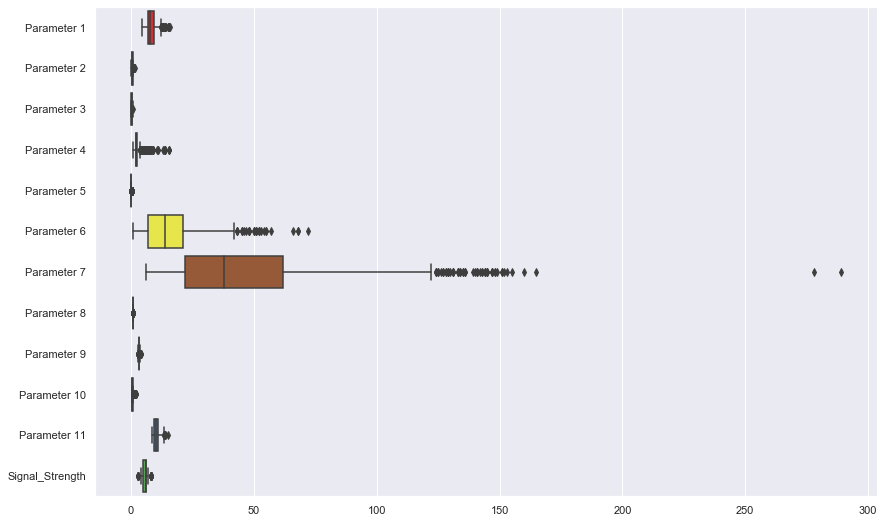

In [1180]:
plt.figure(figsize=(14,9))
sns.boxplot(data = df, orient = 'h', palette = 'Set1', dodge = False);

Observation: 

From the above boxplot we can see that there are outliers are present in mostly all columns. I will be finding the outliers 

###  2. Data Analysis & Visualisation.

### Analysing each attribute with the help of plots.

### A. Parameter 1

Text(0.5, 0, 'Parameter 1')

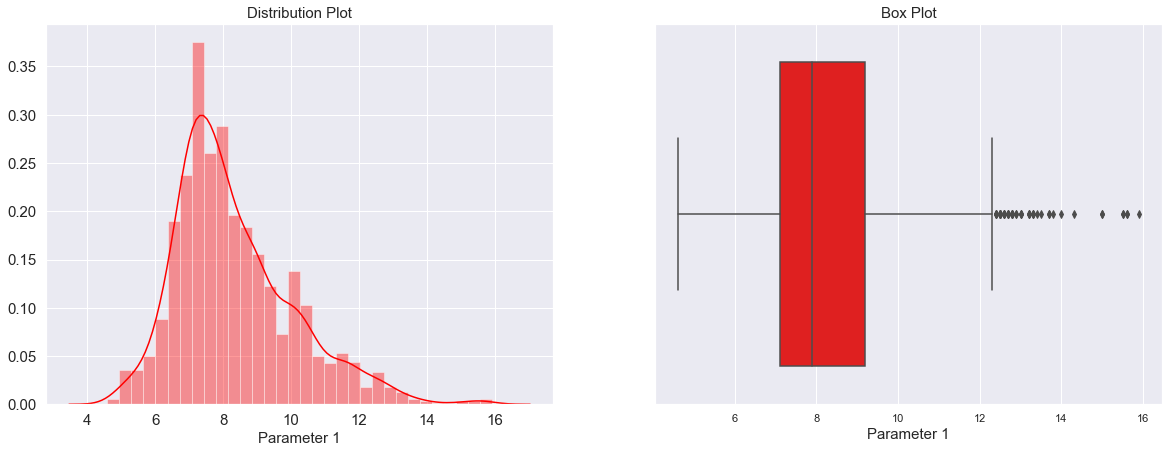

In [1181]:
# Plotting a visual analysis of parameter 1

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 1'], ax = ax1, color = 'red')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 1', fontsize = 15)

sns.boxplot(df['Parameter 1'], ax = ax2, color = 'red')
ax2.set_title('Box Plot', fontsize = 15)
ax2.set_xlabel('Parameter 1', fontsize = 15)

In [1182]:
# Checking outliers in parameter 1 

outlier_cols0 = []

Q1 = df['Parameter 1'].quantile(0.25)    # 1st Quartile
Q3 = df['Parameter 1'].quantile(0.75)    # 3rd Quartile

IQR = Q3 - Q1         # Interquartile range

LTV_para1 = Q1 - 1.5 * IQR               # Lower range bound
UTV_para1 = Q3 + 1.5 * IQR               # Upper range bound 


print('Interquartile range =', IQR)
print('Parameter 1 <', LTV_para1, 'and >', UTV_para1, 'are outliers')
print('Number of outliers in parameter 1 column below the lower whisker =', df[df['Parameter 1'] < (Q1 - (1.5*IQR))]['Parameter 1'].count())
print('Number of outliers in parameter 1 column above the upper whisker =', df[df['Parameter 1'] > (Q3 + (1.5*IQR))]['Parameter 1'].count())

outlier_cols0.append('Parameter 1')
upperLowerBound_Disct = {'Parameter 1' : UTV_para1}

Interquartile range = 2.0999999999999996
Parameter 1 < 3.95 and > 12.349999999999998 are outliers
Number of outliers in parameter 1 column below the lower whisker = 0
Number of outliers in parameter 1 column above the upper whisker = 49


Observation :

We can observe from the outlier analysis above that we have a total of 49 outliers in "Parameter 1" which is towards the upper whisker. We will treat them later on.


### B. Parameter 2

Text(0.5, 0, 'Parameter 2')

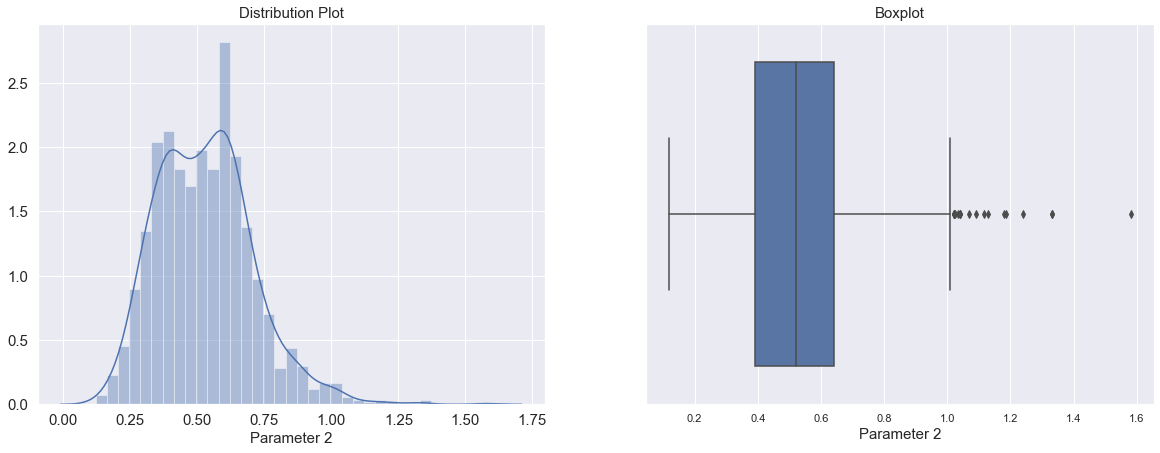

In [1183]:
# Plotting a visual analysis of parameter 2

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 2'], ax = ax1, color = 'b')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 2', fontsize = 15)

sns.boxplot(df['Parameter 2'], ax = ax2, color = 'b')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 2', fontsize = 15)


In [1184]:
# Checking outliers in parameter 2

outlier_cols1 = []

Q1 = df['Parameter 2'].quantile(0.25)    # 1st Quartile
Q3 = df['Parameter 2'].quantile(0.75)    # 3rd Quartile

IQR = Q3 - Q1         # Interquartile range

LTV_para2 = Q1 - 1.5 * IQR               # Lower range bound
UTV_para2 = Q3 + 1.5 * IQR               # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 2 <', LTV_para2, 'and >', UTV_para2, 'are outliers')
print('Number of outliers in the parameter 2 column below the lower whisker =', df[df['Parameter 2'] < (Q1 - (1.5*IQR))]['Parameter 2'].count())
print('Number of outliers in the parameter 2 column above the upper whisker =', df[df['Parameter 2'] > (Q3 + (1.5*IQR))]['Parameter 2'].count())

outlier_cols1.append('Parameter 2')
upperLowerBound_Disct = {'Parameter 2' : UTV_para2}

Interquartile range = 0.25
Parameter 2 < 0.015000000000000013 and > 1.0150000000000001 are outliers
Number of outliers in the parameter 2 column below the lower whisker = 0
Number of outliers in the parameter 2 column above the upper whisker = 19


Observation :

We can observe from the outlier analysis above that we have a total of 19 outliers in "Parameter 2" which is towards the upper whisker. We will treat them later on.

### C. Parameter 3

Text(0.5, 0, 'Parameter 3')

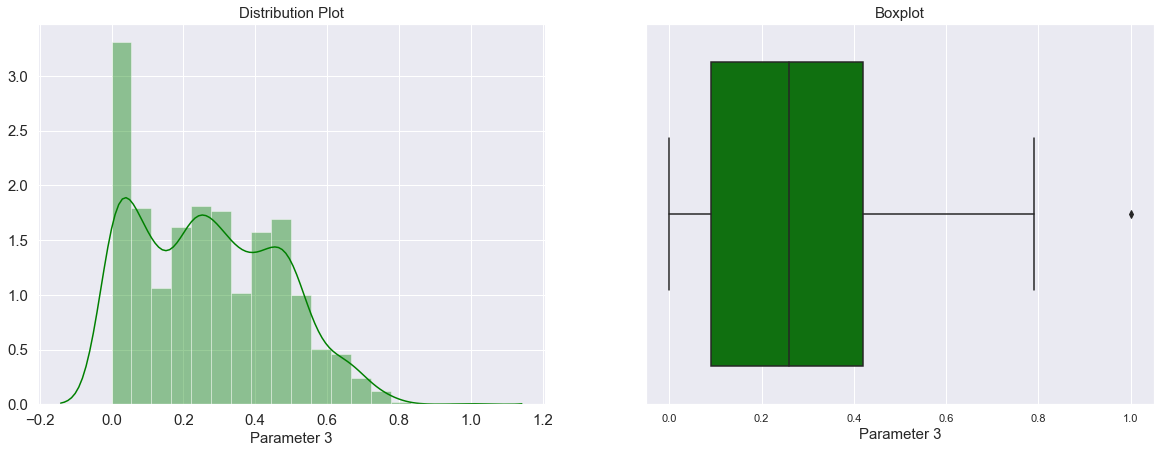

In [1185]:
# Plotting a visual analysis of parameter 3

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 3'], ax = ax1, color = 'green')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 3', fontsize = 15)

sns.boxplot(df['Parameter 3'], ax = ax2, color = 'green')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 3', fontsize = 15)

In [1186]:
# Checking outliers in parameter 3

outlier_cols2 = []

Q1 = df['Parameter 3'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 3'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para3 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para3 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 3 <', LTV_para3, 'and >', UTV_para3, 'are outliers')
print('Number of outliers in the parameter 3 column below the lower whisker =', df[df['Parameter 3'] < (Q1 - (1.5*IQR))]['Parameter 3'].count())
print('Number of outliers in the parameter 3 column above the upper whisker =', df[df['Parameter 3'] > (Q3 + (1.5*IQR))]['Parameter 3'].count())

outlier_cols2.append('Parameter 3')
upperLowerBound_Disct = {'Parameter 3' : UTV_para3}

Interquartile range =  0.32999999999999996
Parameter 3 < -0.4049999999999999 and > 0.9149999999999999 are outliers
Number of outliers in the parameter 3 column below the lower whisker = 0
Number of outliers in the parameter 3 column above the upper whisker = 1


Observation :

We can observe from the outlier analysis above that we have a total of 1 outlier in "Parameter 3" which is towards the upper whisker. We will treat them later on.

### D. Parameter 4

Text(0.5, 0, 'Parameter 4')

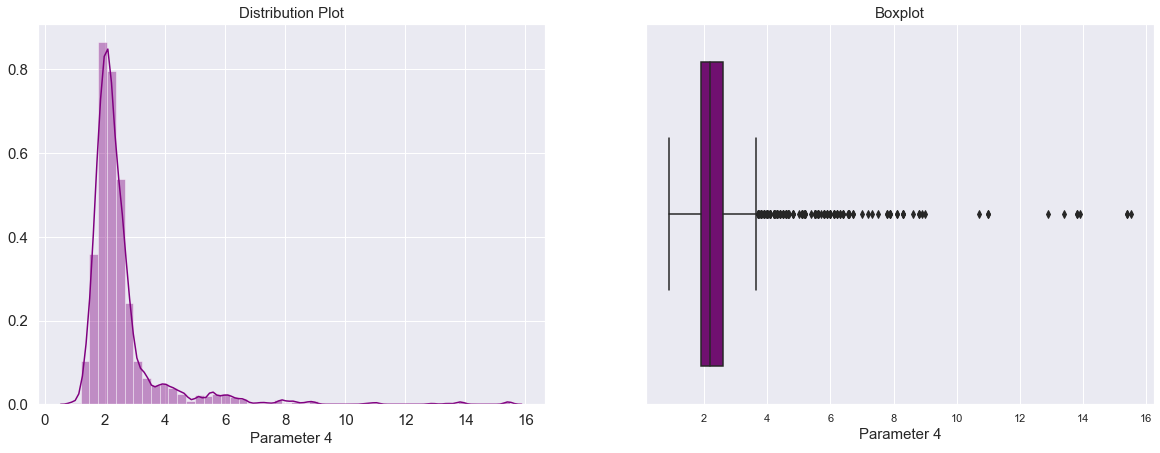

In [1187]:
# Plotting a visual analysis of parameter 4

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 4'], ax = ax1, color = 'purple')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 4', fontsize = 15)

sns.boxplot(df['Parameter 4'], ax = ax2, color = 'purple')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 4', fontsize = 15)

In [1188]:
# Checking outliers in parameter 4

outlier_cols3 = []

Q1 = df['Parameter 4'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 4'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para4 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para4 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 4 <', LTV_para4, 'and >', UTV_para4, 'are outliers')
print('Number of outliers in the parameter 4 column below the lower whisker =', df[df['Parameter 4'] < (Q1 - (1.5*IQR))]['Parameter 4'].count())
print('Number of outliers in the parameter 4 column above the upper whisker =', df[df['Parameter 4'] > (Q3 + (1.5*IQR))]['Parameter 4'].count())

outlier_cols3.append('Parameter 4')
upperLowerBound_Disct = {'Parameter 4' : UTV_para4}

Interquartile range =  0.7000000000000002
Parameter 4 < 0.8499999999999996 and > 3.6500000000000004 are outliers
Number of outliers in the parameter 4 column below the lower whisker = 0
Number of outliers in the parameter 4 column above the upper whisker = 155


Observation :

We can observe from the outlier analysis above that we have a total of 155 outliers in "Parameter 4" which is towards the upper whisker. We will treat them later on.

### E. Parameter 5



Text(0.5, 0, 'Parameter 5')

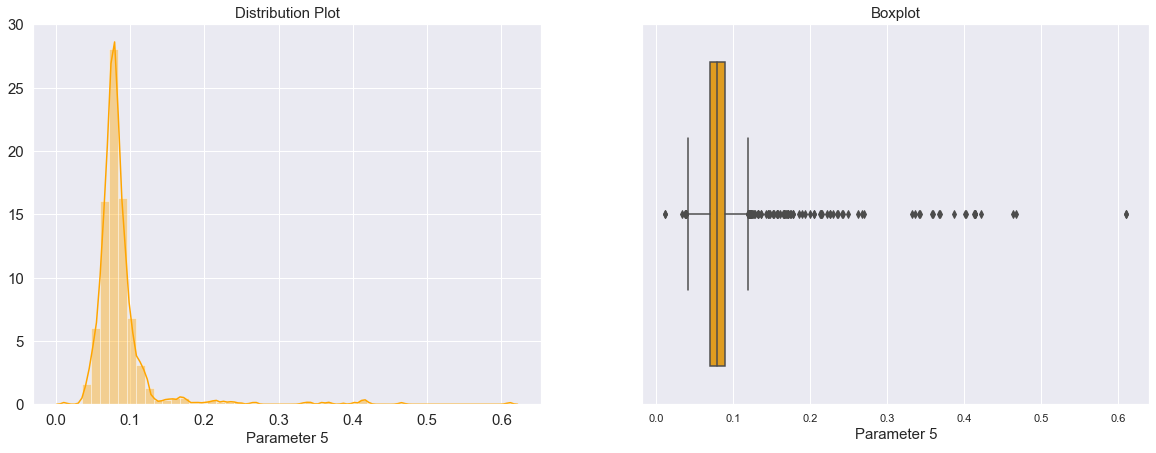

In [1189]:
# Plotting a visual analysis of parameter 5

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 5'], ax = ax1, color = 'orange')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 5', fontsize = 15)

sns.boxplot(df['Parameter 5'], ax = ax2, color = 'orange')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 5', fontsize = 15)

In [1190]:
# Checking outliers in parameter 5

outlier_cols4 = []

Q1 = df['Parameter 5'].quantile(0.25)     # 1st Quartile
Q3 = df['Parameter 5'].quantile(0.75)     # 3rd Quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para5 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para5 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range = ', IQR)
print('Parameter 5 <', LTV_para5, 'and >', UTV_para5, 'are outliers')
print('Number of outliers in the parameter 5 column below the lower whisker =', df[df['Parameter 5'] < (Q1 - (1.5*IQR))]['Parameter 5'].count())
print('Number of outliers in the parameter 5 column above the upper whisker =', df[df['Parameter 5'] > (Q3 + (1.5*IQR))]['Parameter 5'].count())

outlier_cols4.append('Parameter 5')
upperLowerBound_Disct = {'Parameter 5' : UTV_para5}

Interquartile range =  0.01999999999999999
Parameter 5 < 0.04000000000000002 and > 0.11999999999999998 are outliers
Number of outliers in the parameter 5 column below the lower whisker = 9
Number of outliers in the parameter 5 column above the upper whisker = 103


Observation :

We can observe from the outlier analysis above that we have a total of 112 outlier in "Parameter 5", 9 towards the lower whisker and 103 towards the upper whisker. We will treat them later on.

### F. Parameter 6

Text(0.5, 0, 'Parameter 6')

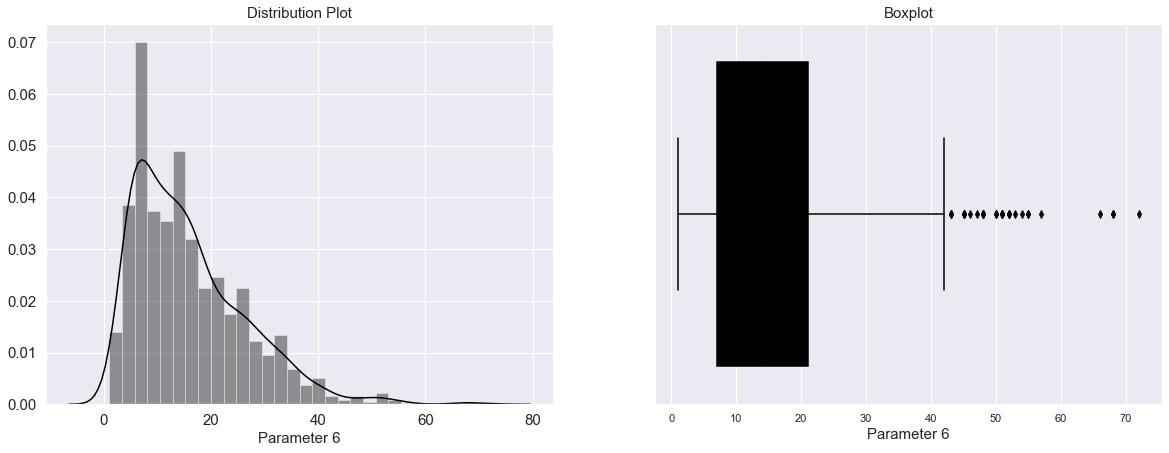

In [1191]:
# Plotting a visual analysis of parameter 6

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 6'], ax = ax1, color = 'black')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 6', fontsize = 15)

sns.boxplot(df['Parameter 6'], ax = ax2, color = 'black')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 6', fontsize = 15)

In [1192]:
# Checking outliers in parameter 6

outlier_cols5 = []

Q1 = df['Parameter 6'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 6'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1          #Interquartile range

LTV_para6 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para6 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 6 <', LTV_para6, ' and >', UTV_para6, 'are outliers')
print('Number of outliers in the parameter 6 column below the lower whisker =', df[df['Parameter 6'] < (Q1 - (1.5*IQR))]['Parameter 6'].count())
print('Number of outliers in the parameter 6 column above the upper whisker =', df[df['Parameter 6'] > (Q3 + (1.5*IQR))]['Parameter 6'].count())

outlier_cols5.append('Parameter 6')
upperLowerBand_Disct = {'Parameter 6' : UTV_para6}

Interquartile range = 14.0
Parameter 6 < -14.0  and > 42.0 are outliers
Number of outliers in the parameter 6 column below the lower whisker = 0
Number of outliers in the parameter 6 column above the upper whisker = 30


Observation :

We can observe from the outlier analysis above that we have a total of 30 outliers in "Parameter 6" which is towards the upper whisker. We will treat them later on.

### G. Parameter 7

Text(0.5, 0, 'Parameter 7')

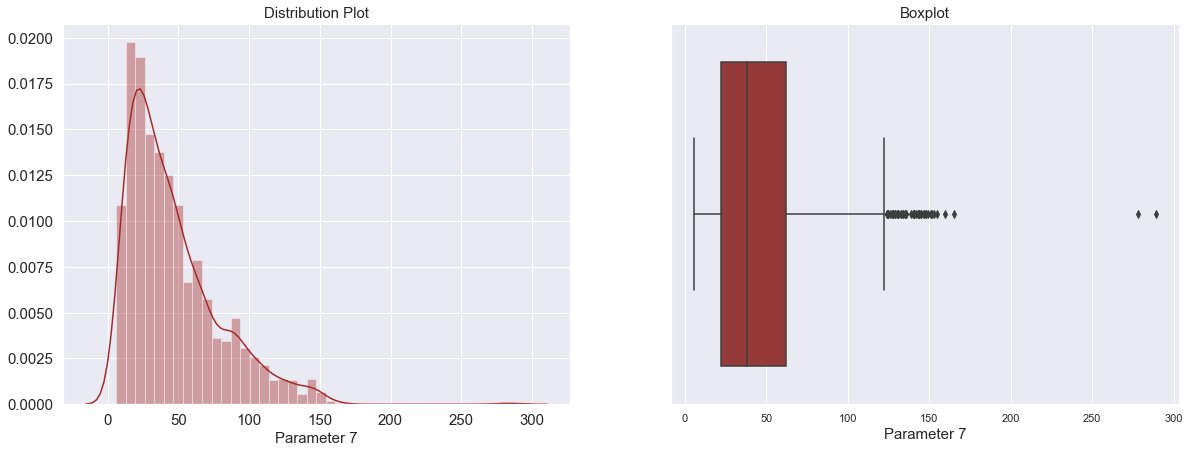

In [1193]:
# Plotting a visual analysis of parameter 7

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 7'], ax = ax1, color = 'brown')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 7', fontsize = 15)

sns.boxplot(df['Parameter 7'], ax = ax2, color = 'brown')
ax2.set_title('Boxplot', fontsize= 15)
ax2.set_xlabel('Parameter 7', fontsize = 15)

In [1194]:
# Checking outliers in parameter 7

outlier_cols6 = []

Q1 = df['Parameter 7'].quantile(0.25)      # 1st quartile
Q3 = df['Parameter 7'].quantile(0.75)      # 3rd quartile

IQR = Q3 - Q1            # Interquartile range

LTV_para7 = Q1 - 1.5 * IQR                 # Lower range bound
UTV_para7 = Q3 + 1.5 * IQR                 # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 7 <', LTV_para7, 'and >', UTV_para7, 'are outliers')
print('Number of outliers in the parameter 7 column below the lower whisker =', df[df['Parameter 7'] < (Q1 - (1.5*IQR))]['Parameter 7'].count())
print('Number of outliers in the parameter 7 column above the upper whisker =', df[df['Parameter 7'] > (Q3 + (1.5*IQR))]['Parameter 7'].count())

outlier_cols6.append('Parameter 7')
upperLowerBound_Disct = {'Parameter 7' : UTV_para7}

Interquartile range = 40.0
Parameter 7 < -38.0 and > 122.0 are outliers
Number of outliers in the parameter 7 column below the lower whisker = 0
Number of outliers in the parameter 7 column above the upper whisker = 55


Observation :

We can observe from the outlier analysis above that we have a total of 55 outliers in "Parameter 6" which is towards the upper whisker. We will treat them later on.

### H. Parameter 8

Text(0.5, 0, 'Parameter 8')

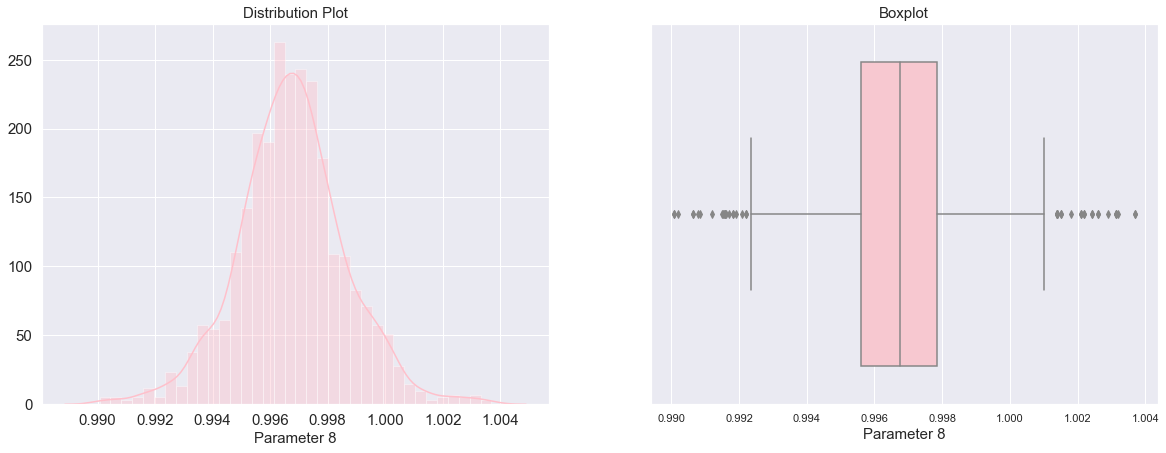

In [1195]:
# Plotting a visual analysis of parameter 8

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 8'], ax = ax1, color = 'pink')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 8', fontsize = 15)

sns.boxplot(df['Parameter 8'], ax = ax2, color = 'pink')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 8', fontsize = 15)

In [1196]:
# Checking outliers in parameter 8

outlier_cols7 = []

Q1 = df['Parameter 8'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 8'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1            # Interquartile range
 
LTV_para8 = Q1 - 1.5 * IQR                 # Lower range bound
UTV_para8 = Q3 + 1.5 * IQR                 # Upper range bound 


print('Interquartile range = ', IQR)
print('Parameter 8 <', LTV_para8, 'and >', UTV_para8, 'are outliers')
print('Number of outliers in the parameter 8 column below the lower whisker =', df[df['Parameter 8'] < (Q1 - (1.5*IQR))]['Parameter 8'].count())
print('Number of outliers in the parameter 8 column above the upper whisker =', df[df['Parameter 8'] > (Q3 + (1.5*IQR))]['Parameter 8'].count())

outlier_cols7.append('Parameter 8')
upperLowerBound_Disct = {'Parameter 8' : UTV_para8}

Interquartile range =  0.002234999999999876
Parameter 8 < 0.9922475000000002 and > 1.0011874999999997 are outliers
Number of outliers in the parameter 8 column below the lower whisker = 21
Number of outliers in the parameter 8 column above the upper whisker = 24


Observation :

We can observe from the outlier analysis above that we have a total of 45 outlier in "Parameter 8", 21 towards the lower whisker and 24 towards the upper whisker. We will treat them later on.

### I. Parameter 9

In [1197]:
# Plotting a visual analysis of parameter 9

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 9'], ax = ax1, color = 'grey')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 9', fontsize = 15)

sns.boxplot(df['Parameter 9'], ax = ax2, color = 'grey')
ax1.set_title('Boxplot', fontsize = 15)
ax1.set_xlabel('Parameter 9', fontsize = 15)

Text(0.5, 0, 'Parameter 9')

In [1198]:
# Checking outliers in parameter 9

outlier_cols8 = []

Q1 = df['Parameter 9'].quantile(0.25)      # 1st quantile
Q3 = df['Parameter 9'].quantile(0.75)      # 3rd quantile

IQR = Q3 - Q1            # Interquartile range

LTV_para9 = Q1 - 1.5 * IQR                  # Lower range bound
UTV_para9 = Q3 + 1.5 * IQR                  # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 9 <', LTV_para9, 'and >', UTV_para9, 'are outliers')
print('Number of outliers in the parameter 9 column below the lower whisker =', df[df['Parameter 9'] < (Q1 - (1.5*IQR))]['Parameter 9'].count())
print('Number of outliers in the parameter 9 column above the upper whisker =', df[df['Parameter 9'] > (Q3 + (1.5*IQR))]['Parameter 9'].count())

outlier_cols8.append('Parameter 9')
upperLowerBound_Disct = {'Parameter 9' : UTV_para9}

Interquartile range = 0.18999999999999995
Parameter 9 < 2.925 and > 3.6849999999999996 are outliers
Number of outliers in the parameter 9 column below the lower whisker = 14
Number of outliers in the parameter 9 column above the upper whisker = 21


Observation :

We can observe from the outlier analysis above that we have a total of 35 outlier in "Parameter 9", 14 towards the lower whisker and 21 towards the upper whisker. We will treat them later on.

### J. Parameter 10

Text(0.5, 0, 'Parameter 10')

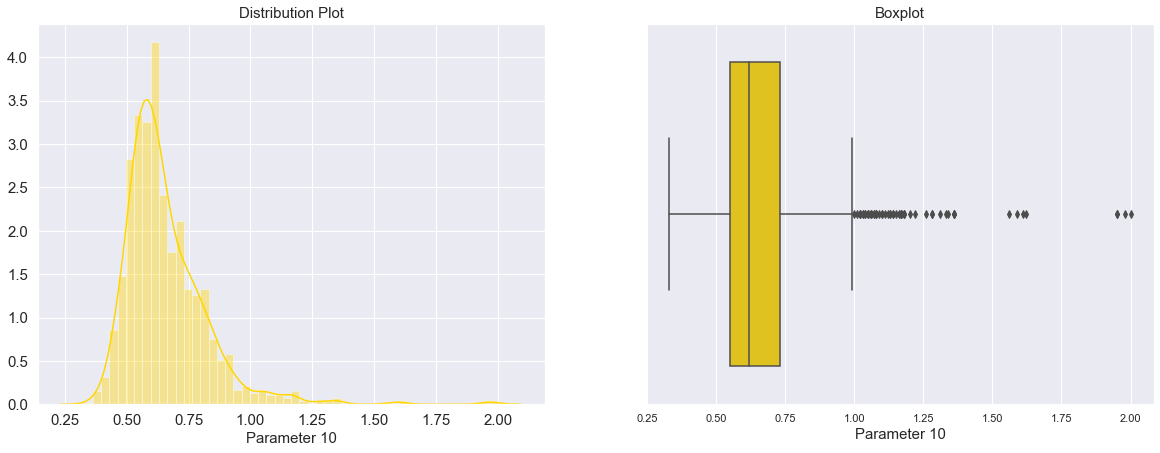

In [1199]:
# Plotting a visual analysis of parameter 10

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 10'], ax = ax1, color = 'gold')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 10', fontsize = 15)

sns.boxplot(df['Parameter 10'], ax = ax2, color = 'gold')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 10', fontsize = 15)

In [1200]:
# Checking outliers in parameter 10

outlier_cols9 = []

Q1 = df['Parameter 10'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 10'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para10 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para10 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 10 <', LTV_para10, 'and >', UTV_para10, 'are outliers')
print('Number of outliers in the parameter 10 column below the lower whisker =', df[df['Parameter 10'] < (Q1 - (1.5*IQR))]['Parameter 10'].count())
print('Number of outliers in the parameter 10 column below the upper whisker =', df[df['Parameter 10'] > (Q3 + (1.5*IQR))]['Parameter 10'].count())

outlier_cols9.append('Parameter 10')
upperLowerBound_Disct = {'Parameter 10' : UTV_para10}

Interquartile range = 0.17999999999999994
Parameter 10 < 0.28000000000000014 and > 0.9999999999999999 are outliers
Number of outliers in the parameter 10 column below the lower whisker = 0
Number of outliers in the parameter 10 column below the upper whisker = 59


Observation :

We can observe from the outlier analysis above that we have a total of 59 outliers in "Parameter 10" which is towards the upper whisker. We will treat them later on.

### K. Parameter 11

Text(0.5, 0, 'Parameter 11')

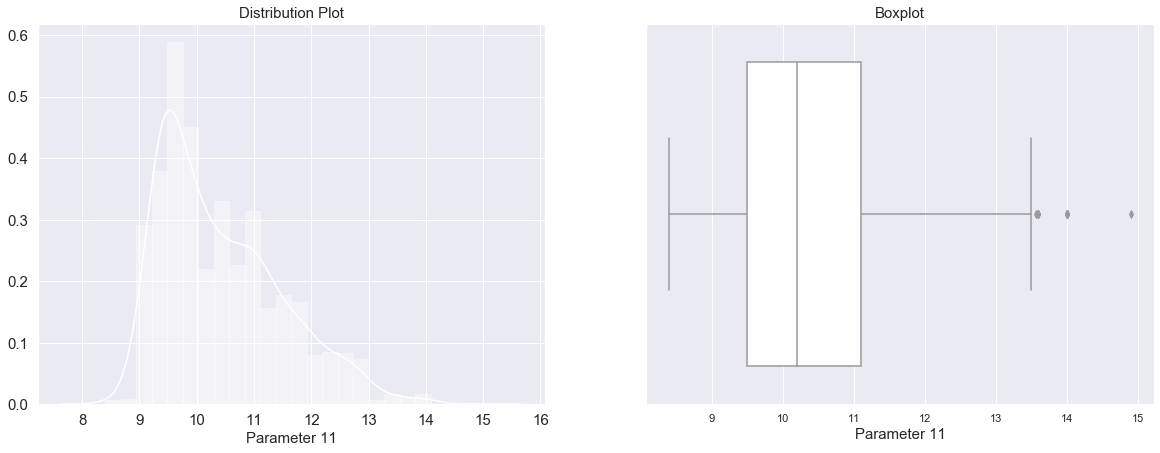

In [1201]:
# Plotting a visual analysis of parameter 11

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Parameter 11'], ax = ax1, color = 'white')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Parameter 11', fontsize = 15)

sns.boxplot(df['Parameter 11'], ax = ax2, color = 'white')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Parameter 11', fontsize = 15)

In [1202]:
# Checking outliers in parameter 11

outlier_cols10 = []

Q1 = df['Parameter 11'].quantile(0.25)     # 1st quartile
Q3 = df['Parameter 11'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para11 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para11 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Parameter 11 <', LTV_para11, 'and >', UTV_para11, 'are outliers')
print('Number of outliers in the parameter 11 column below the lower whisker =', df[df['Parameter 11'] < (Q1 - (1.5*IQR))]['Parameter 11'].count())
print('Number of outliers in the parameter 11 column below the upper whisker =', df[df['Parameter 11'] > (Q3 + (1.5*IQR))]['Parameter 11'].count())

outlier_cols10.append('Parameter 11')
upperLowerBound_Disct = {'Parameter 11' : UTV_para11}

Interquartile range = 1.5999999999999996
Parameter 11 < 7.1000000000000005 and > 13.5 are outliers
Number of outliers in the parameter 11 column below the lower whisker = 0
Number of outliers in the parameter 11 column below the upper whisker = 13


Observation :

We can observe from the outlier analysis above that we have a total of 13 outliers in "Parameter 11" which is towards the upper whisker. We will treat them later on.

### L. Signal_Strength

Text(0.5, 0, 'Signal_Strength')

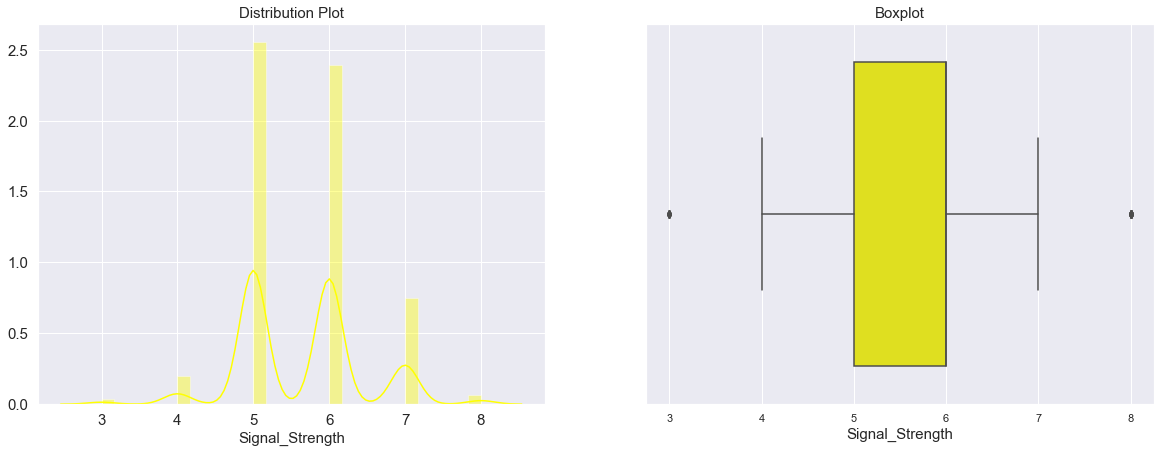

In [1203]:
# Plotting a visual analysis of signal_strength

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,7))
fig.set_size_inches(20,7)

sns.distplot(df['Signal_Strength'], ax = ax1, color = 'yellow')
ax1.tick_params(labelsize = 15)
ax1.set_title('Distribution Plot', fontsize = 15)
ax1.set_xlabel('Signal_Strength', fontsize = 15)

sns.boxplot(df['Signal_Strength'], ax = ax2, color = 'yellow')
ax2.set_title('Boxplot', fontsize = 15)
ax2.set_xlabel('Signal_Strength', fontsize = 15)

In [1204]:
# Checking outliers in signal_strength

outlier_cols11 = []

Q1 = df['Signal_Strength'].quantile(0.25)     # 1st quartile
Q3 = df['Signal_Strength'].quantile(0.75)     # 3rd quartile

IQR = Q3 - Q1           # Interquartile range

LTV_para12 = Q1 - 1.5 * IQR                # Lower range bound
UTV_para12 = Q3 + 1.5 * IQR                # Upper range bound


print('Interquartile range =', IQR)
print('Signal_Strength <', LTV_para12, 'and >', UTV_para12, 'are outliers')
print('Number of outliers in the Signal_Strength column below the lower whisker =', df[df['Signal_Strength'] < (Q1 - (1.5*IQR))]['Signal_Strength'].count())
print('Number of outliers in the Signal_Strength column below the upper whisker =', df[df['Signal_Strength'] > (Q3 + (1.5*IQR))]['Signal_Strength'].count())

outlier_cols11.append('Signal_Strength')
upperLowerBound_Disct = {'Signal_Strength' : UTV_para12}

Interquartile range = 1.0
Signal_Strength < 3.5 and > 7.5 are outliers
Number of outliers in the Signal_Strength column below the lower whisker = 10
Number of outliers in the Signal_Strength column below the upper whisker = 18


Observation :

We can observe from the outlier analysis above that we have a total of 28 outlier in "Signal_Strength", 10 towards the lower whisker and 18 towards the upper whisker. We will treat them later on.

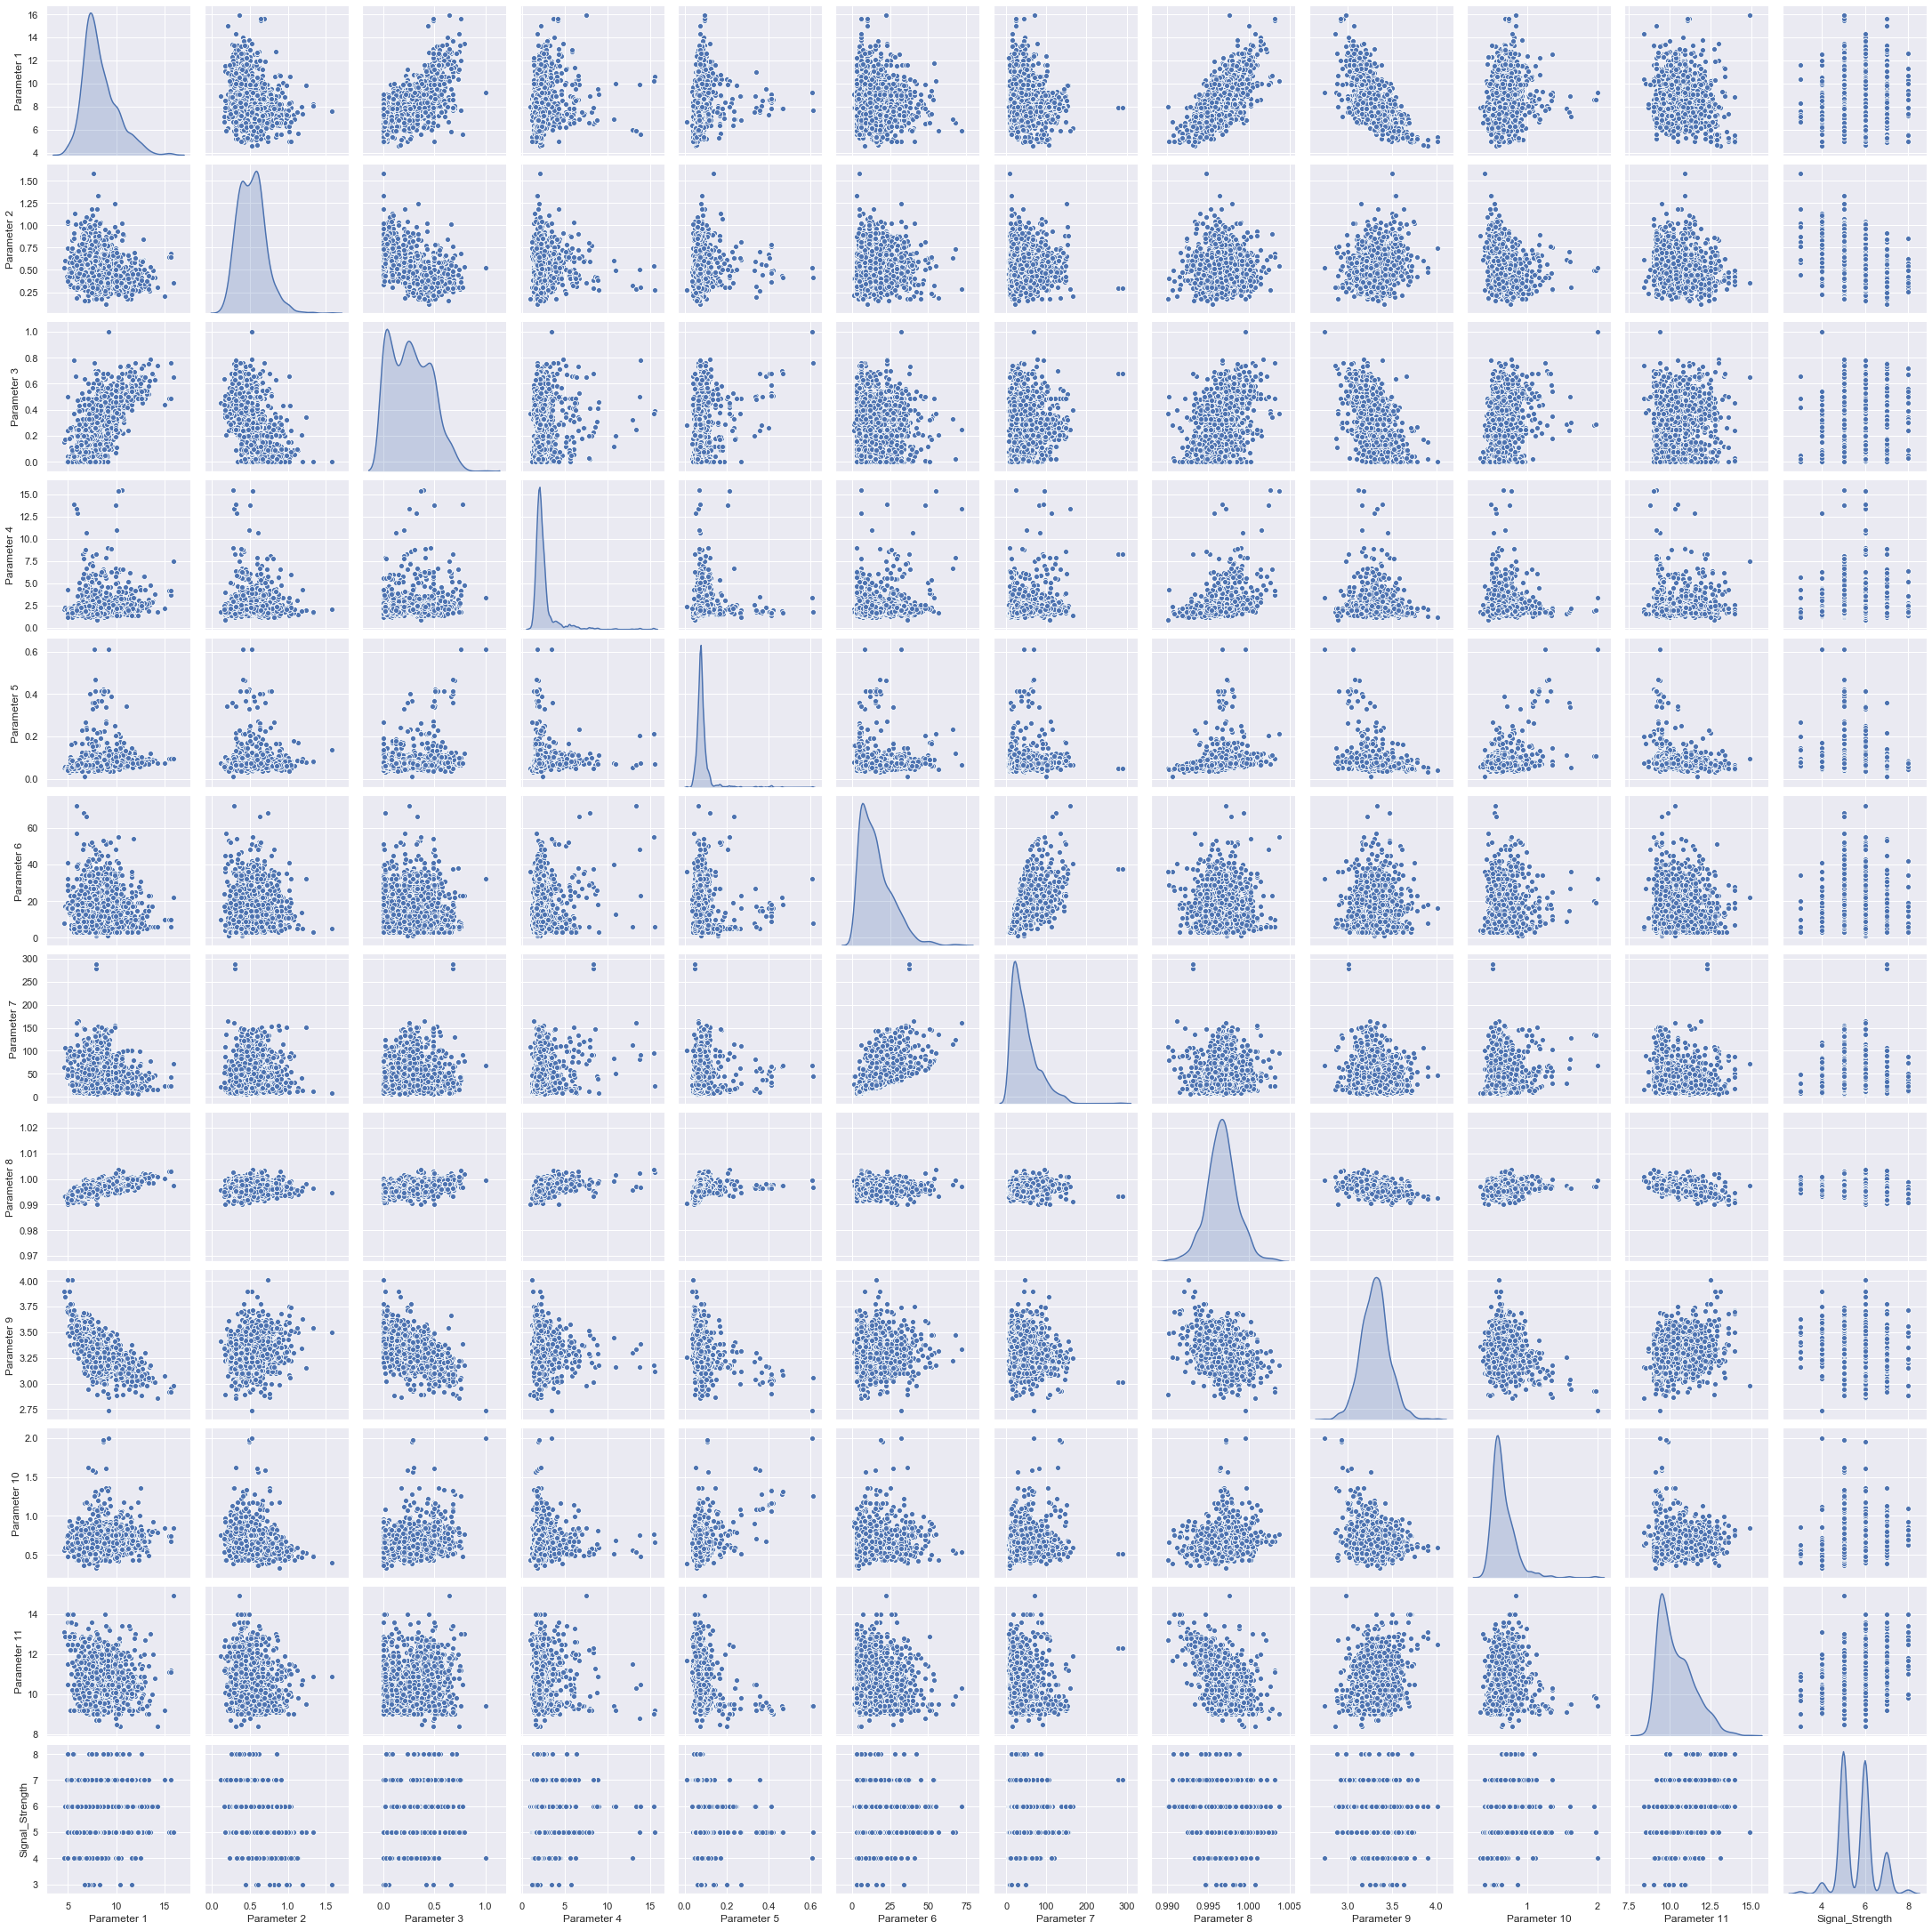

In [1205]:
# Pairplot visual analysis to check correlation amongst different fields

sns.pairplot(df, diag_kind = 'kde');

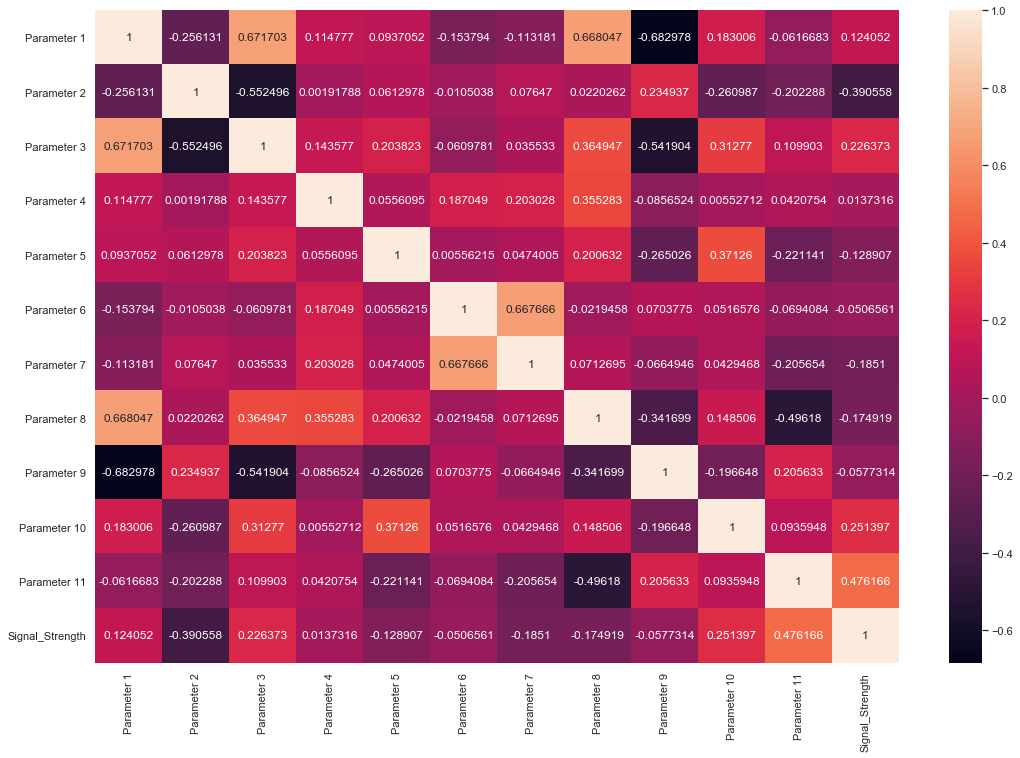

In [1206]:
df.corr()

plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, fmt = 'g');

Observation : From the above pair plot & heatmap we can infer the relationship amongst the attributes and target column as follows:

1. We have some strong negative correlations between (Parameter 1 & Parameter 9) (-0.68), (Parameter 3 & Parameter 9) (-0.54), (Parameter 2 & Parameter 3) (-0.55), (Parameter 8 & Parameter 11) (-0.49), 


2. Signal_Strength have some positive linear relation with (Parameter 11 that means if the quality of Parameter 11 goes up Signal_Strength will be more).


3. We also have positive correlations between (Parameter 1 & Parameter 3) (0.67), (Parameter 1 & Parameter 8) (0.66), (Parameter 7 & Parameter 6) (0.66).


4. Also it is quite visible that there are multiple gaussians in Parameter 3.


5. Rest of the relations between other individual attributes are mostly cloud shaped or symmetrical shaped.

### Pick one strategy to address the presence outliers and missing values and perform necessary imputation


------------------------ Fixing Outliers ------------------------

- As we have seen above outlier are present in the given dataset.


- There are multiple ways to deal with outliers but I mostly prefer either to drop the outliers or repalce it with median/mean.


- Here I am going to replace the outliers with median because if we drop them, there may be chance to loose some important information which we dont want to as it could hamper our overall anylysis.

In [1207]:
# Showing the columns where outliers exist

print('These are the columns which have outliers : \n\n', outlier_cols0, outlier_cols1, outlier_cols2, outlier_cols3, outlier_cols4, outlier_cols5, outlier_cols6, outlier_cols7, outlier_cols8, outlier_cols9, outlier_cols10, outlier_cols11)

These are the columns which have outliers : 

 ['Parameter 1'] ['Parameter 2'] ['Parameter 3'] ['Parameter 4'] ['Parameter 5'] ['Parameter 6'] ['Parameter 7'] ['Parameter 8'] ['Parameter 9'] ['Parameter 10'] ['Parameter 11'] ['Signal_Strength']


In [1212]:
df_new = df.copy()

In [1213]:
# Treating outliers present in respective columns

for col_names in df_new.columns[:11]:
    q1 = df_new[col_names].quantile(0.25)
    q3 = df_new[col_names].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    
    df_new.loc[(df_new[col_names] < low) | (df_new[col_names] > high), col_names] = df_new[col_names].median()

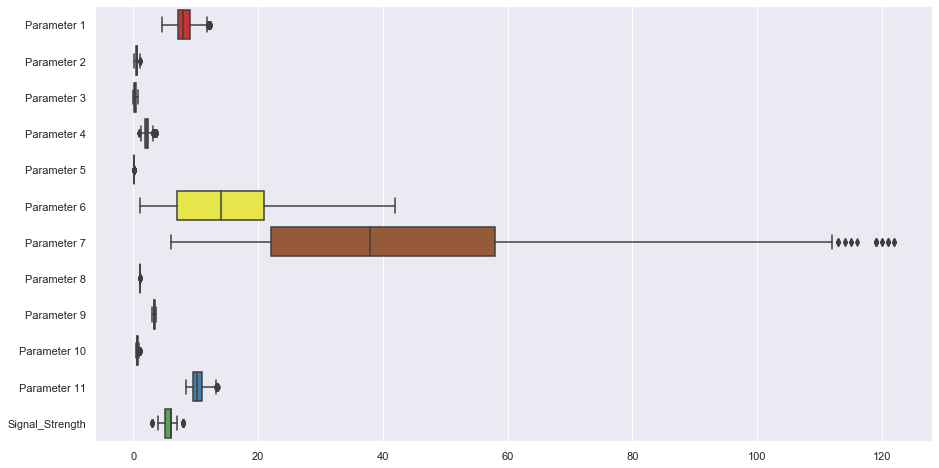

In [1214]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_new, orient='h', palette='Set1', dodge=False);


Observation :

Now we can see from the above visual analysis of boxplots that most of the outliers are replaced with their median. We can see that most of the outliers are removed, but because of their gaussians replacing it with median values, the attributes raised with new outliers which we can ignore.

In [1215]:
df_new[['Signal_Strength']] = df_new[['Signal_Strength']].astype('category')

In [1216]:
df_new.shape

(1599, 12)

In [1217]:
df_new.size

19188

In [1218]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11 Signal_Strength  
0           9.4               5  
1           9.8               5  
2           9.8               5  
3           9.8               6  
4           9.4               5

In [1219]:
df_new.count(axis = 0)

Parameter 1        1599
Parameter 2        1599
Parameter 3        1599
Parameter 4        1599
Parameter 5        1599
Parameter 6        1599
Parameter 7        1599
Parameter 8        1599
Parameter 9        1599
Parameter 10       1599
Parameter 11       1599
Signal_Strength    1599
dtype: int64

In [1220]:
df_new.dtypes

Parameter 1         float64
Parameter 2         float64
Parameter 3         float64
Parameter 4         float64
Parameter 5         float64
Parameter 6         float64
Parameter 7         float64
Parameter 8         float64
Parameter 9         float64
Parameter 10        float64
Parameter 11        float64
Signal_Strength    category
dtype: object

### Feature Engineering Techniques



### Creating Composite Features, ( "Parameter 2,3,4,9,10" ratio by dividing the values of "Parameter 9 with 2,3,10" )

In [1221]:
df_new.insert(df_new.shape[-1]-1,'Parameter 2,3,9 & 10',df_new['Parameter 9']/(df_new['Parameter 2'] + df_new['Parameter 3'] + df_new['Parameter 10']))

In [1222]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10 Signal_Strength  
0           9.4              2.785714               5  
1           9.8              2.051282               5  
2           9.8              2.248276               5  
3           9.8              2.225352               6  
4           9.4              2.785714               5

### Creating Composite Features, ( "Parameter 1 & 11" ratio by dividing the values of "Parameter 11 with 1" )

In [1223]:
df_new.insert(df_new.shape[-1]-1, 'Parameter 1 & 11', df_new['Parameter 11']/df_new['Parameter 1'])

In [1224]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11 Signal_Strength  
0           9.4              2.785714           1.27027               5  
1           9.8              2.051282           1.25641               5  
2           9.8              2.248276           1.25641               5  
3           9.8              2.225352           0.87500               6  
4           9.4              2.785714           1.27027               5

### Creating Composite Features, ( "Parameter 4,5, & 8" ratio by dividing the values of "Parameter 4 with 8 & 5" )

In [1225]:
df_new.insert(df_new.shape[-1]-1,'Parameter 4,5 & 8',df_new['Parameter 4']/(df_new['Parameter 8'] + df_new['Parameter 5']))

In [1226]:
df_new.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11  Parameter 4,5 & 8  \
0           9.4              2.785714           1.27027           1.769417   
1           9.8              2.051282           1.25641           2.374863   
2           9.8              2.248276           1.25641           2.112029   
3           9.8              2.225352           0.87500           1.770736   
4           9.4              2.785714           1.27027           1.769417   

  Signal_Strength  
0               5  
1               5  
2               5  
3               6  
4               5

In [1227]:
df_new.shape

(1599, 15)

In [1228]:
df_new.size

23985

In [1229]:
df_new.isnull().sum()

Parameter 1             0
Parameter 2             0
Parameter 3             0
Parameter 4             0
Parameter 5             0
Parameter 6             0
Parameter 7             0
Parameter 8             0
Parameter 9             0
Parameter 10            0
Parameter 11            0
Parameter 2,3,9 & 10    0
Parameter 1 & 11        0
Parameter 4,5 & 8       0
Signal_Strength         0
dtype: int64

In [1230]:
### Splitting X-independent attributes and Y-dependent attributes and keeping the test set seperate

x = df_new.drop(['Signal_Strength'], axis = 1)
y = df_new[['Signal_Strength']]

In [1231]:
x.apply(zscore)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0       -0.506257     1.084072    -1.395226    -0.660402    -0.193503   
1       -0.237876     2.171450    -1.395226     0.980050     1.341692   
2       -0.237876     1.446531    -1.188918     0.276999     0.923002   
3        2.043366    -1.453143     1.493090    -0.660402    -0.263285   
4       -0.506257     1.084072    -1.395226    -0.660402    -0.193503   
...           ...          ...          ...          ...          ...   
1594    -1.311401     0.479973    -0.982609    -0.426051     0.783439   
1595    -1.512687     0.177924    -0.879455     0.042649    -1.170445   
1596    -1.244306    -0.063716    -0.724724     0.276999    -0.193503   
1597    -1.512687     0.751818    -0.776301    -0.426051    -0.263285   
1598    -1.445592    -1.271913     1.028897     3.323553    -0.821537   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0       -0.455657    -0.329932     0.648369     1.448448     -0.638601   
1        1.076386     0.903736     0.039563    -0.783248      0.372245   
2       -0.017931     0.417746     0.161324    -0.351307      0.119534   
3        0.200933     0.642049     0.770130    -1.071209     -0.470127   
4       -0.455657    -0.329932     0.648369     1.448448     -0.638601   
...           ...          ...          ...          ...           ...   
1594     1.842407     0.043907    -1.117168     1.016507     -0.470127   
1595     2.608428     0.305594    -0.983231     1.520439      1.046143   
1596     1.514112    -0.105629    -0.605771     0.800537      0.961905   
1597     1.842407     0.043907    -0.770149     1.880390      0.624957   
1598     0.310364    -0.030861    -0.757973     0.584566      0.203771   

      Parameter 11  Parameter 2,3,9 & 10  Parameter 1 & 11  Parameter 4,5 & 8  
0        -0.976125              1.066110         -0.167079          -0.661503  
1        -0.582843             -0.829895         -0.215210           0.889886  
2        -0.582843             -0.321337         -0.215210           0.216403  
3        -0.582843             -0.380517         -1.539705          -0.658123  
4        -0.976125              1.066110         -0.167079          -0.661503  
...            ...                   ...               ...                ...  
1594      0.105402              0.943177          1.302808          -0.471705  
1595      0.793647              0.319357          2.013852           0.137217  
1596      0.597006              0.226362          1.485063           0.303559  
1597     -0.189560              0.122859          1.425271          -0.408029  
1598      0.597006             -0.047970          1.788229           3.486623  

[1599 rows x 14 columns]

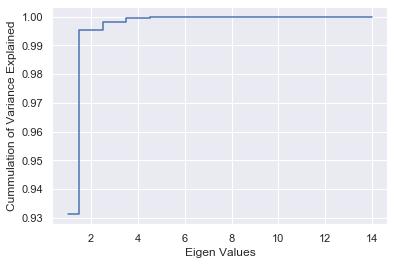

array([0.93112343, 0.99527034, 0.99817434, 0.99941463, 0.99978568,
       0.99992121, 0.99996455, 0.99998237, 0.99999336, 0.99999865,
       0.99999939, 0.99999999, 1.        , 1.        ])

In [1232]:
pca_model = PCA(n_components = 14)
pca_model.fit(x)
plt.step(list(range(1,15)), np.cumsum(pca_model.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cummulation of Variance Explained')
plt.xlabel('Eigen Values')
plt.show()
np.cumsum(pca_model.explained_variance_ratio_)

In [1233]:
cluster = range(1,12)
mean_distortions = []
for val in cluster:
    kmeans = KMeans(n_clusters = val)
    kmeans.fit(df_new)
    mean_distortions.append(sum(np.min(cdist(df_new, kmeans.cluster_centers_), axis = 1))/df_new.shape[0])

In [1234]:
plt.plot(cluster, mean_distortions,'bx-')
plt.xlabel('No. Of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

In [1235]:
X_train1, X_test1, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [1236]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train1)
X_test_sd = StandardScaler().fit_transform(X_test1)

In [1237]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)

label_encoder = preprocessing.LabelEncoder().fit(y_test)
y_test = label_encoder.transform(y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [1238]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Shape of y_train: (1071, 10)
One hot encoded value of y_train: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [1239]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00093458e+00 -2.32410251e-01  5.99138340e-01  1.81366779e-01
   2.00770241e-01 -1.38106617e-01 -1.17948996e-01  5.45473970e-01
  -5.96016295e-01  1.51494592e-01 -4.07013904e-02 -5.60151049e-01
  -8.30272450e-01  1.65313015e-01]
 [-2.32410251e-01  1.00093458e+00 -5.59814698e-01  1.07922524e-02
   1.59415350e-01 -8.04582955e-03  8.01717410e-02 -6.46099117e-03
   1.90831513e-01 -3.16557532e-01 -2.20440731e-01 -4.42435372e-02
   7.51556530e-02  6.40629135e-04]
 [ 5.99138340e-01 -5.59814698e-01  1.00093458e+00  1.63410088e-01
   1.04595515e-01 -6.17874488e-02  6.47931774e-03  3.53543851e-01
  -5.06249440e-01  2.58523442e-01  1.32810983e-01 -6.73142800e-01
  -4.22172072e-01  1.55926053e-01]
 [ 1.81366779e-01  1.07922524e-02  1.63410088e-01  1.00093458e+00
   1.92466826e-01  1.45692815e-02  9.29586456e-02  3.59678476e-01
  -5.43814621e-02  5.42385359e-02  1.15811577e-01 -1.99847489e-01
  -1.06104282e-01  9.98448173e-01]
 [ 2.00770241e-01  1.59415350e-01  1.04595515e

In [1240]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 4.21104370e-01 -8.22452598e-02  1.28079100e-01 -6.84139299e-02
   1.11667098e-01  1.67205110e-02 -1.75744193e-01  5.08077278e-01
   7.25870052e-03 -3.31146817e-01  1.58787734e-01 -5.96996726e-01
  -4.13488723e-02  2.27604449e-03]
 [-1.17233892e-01  3.99690771e-01 -1.75907921e-02 -2.61333660e-01
  -5.59458407e-01  2.48971968e-01 -3.65615882e-01  1.39045605e-01
   1.39823898e-01  4.20102868e-02  9.83917079e-03 -3.38070557e-02
   4.55358020e-01  1.77282701e-03]
 [ 3.64053797e-01 -2.87910085e-01  2.04928987e-02  1.88562334e-01
   1.46556144e-01  1.39645284e-01  1.09587649e-01 -2.07592397e-01
   4.89763651e-01  3.02904163e-01  2.09721105e-01 -4.09751547e-02
   5.24623087e-01  1.63852616e-03]
 [ 1.96505160e-01  1.01110662e-01 -6.12901010e-01 -1.51518591e-01
   1.12117176e-01 -3.35694601e-03 -4.78724443e-02 -7.46302574e-02
  -1.26401829e-01  3.19726093e-02  9.38757925e-02 -1.57397991e-02
   1.05775147e-02 -7.11295922e-01]
 [ 1.85989690e-01  2.96053196e-01  7.16183470e-03 -1.3

In [1241]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.41552882  44.78392973  59.16711025  70.22353598  77.52517611
  83.67351172  88.90823116  92.46080752  95.64198355  97.8876928
  99.69103678  99.89132599  99.99935178 100.        ]


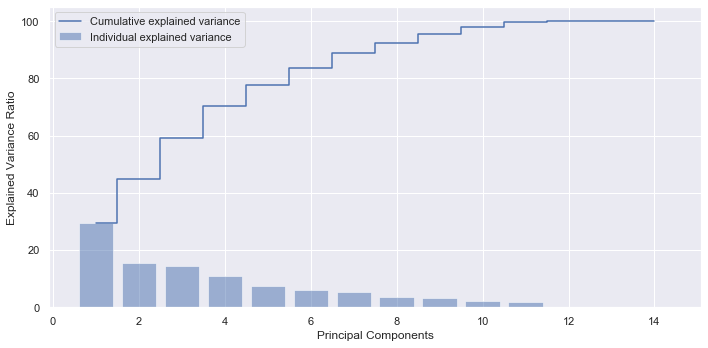

In [1242]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [1243]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:14]

[(4.122022794950574,
  array([ 0.42110437, -0.11723389,  0.3640538 ,  0.19650516,  0.18598969,
         -0.0462487 ,  0.01563347,  0.35776549, -0.33586247,  0.12603527,
         -0.1021161 , -0.37027407, -0.40356049,  0.18364662])),
 (2.1535869471343845,
  array([-0.08224526,  0.39969077, -0.28791009,  0.10111066,  0.2960532 ,
          0.22906666,  0.3361945 ,  0.24665309,  0.04597588, -0.35542731,
         -0.48734998,  0.1382096 , -0.18687519,  0.08004576])),
 (2.01552718417769,
  array([ 0.1280791 , -0.01759079,  0.0204929 , -0.61290101,  0.00716183,
         -0.1190304 , -0.12307615, -0.03847032, -0.20245863, -0.10574859,
         -0.27994017,  0.00551274, -0.24459705, -0.62126854])),
 (1.5493462377287601,
  array([-0.06841393, -0.26133366,  0.18856233, -0.15151859, -0.13552072,
          0.63986044,  0.58567289, -0.04972744, -0.03088081,  0.24418302,
         -0.00628622, -0.0949427 ,  0.06853185, -0.14459807])),
 (1.0231849727991553,
  array([ 0.1116671 , -0.55945841,  0.1465561

In [1244]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(14,1), 
                      eigen_pairs[1][1].reshape(14,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[ 0.42110437 -0.08224526]
 [-0.11723389  0.39969077]
 [ 0.3640538  -0.28791009]
 [ 0.19650516  0.10111066]
 [ 0.18598969  0.2960532 ]
 [-0.0462487   0.22906666]
 [ 0.01563347  0.3361945 ]
 [ 0.35776549  0.24665309]
 [-0.33586247  0.04597588]
 [ 0.12603527 -0.35542731]
 [-0.1021161  -0.48734998]
 [-0.37027407  0.1382096 ]
 [-0.40356049 -0.18687519]
 [ 0.18364662  0.08004576]]


In [1245]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((1071, 14), (14, 2), (1071, 2), (528, 2))

In [1246]:
X_sd_pca, X_train_sd

(array([[ 2.37577805, -0.11579088],
        [-3.07041545, -0.53924261],
        [-1.65303526,  2.31916528],
        ...,
        [-1.08962381,  2.34631815],
        [-1.24284746, -3.83430216],
        [-3.85828245, -3.25440715]]),
 array([[-1.67185350e-01, -1.06169860e+00,  1.13839302e+00, ...,
         -1.05859058e+00, -3.01152034e-03,  9.95481094e-01],
        [-9.87286922e-01,  1.35318727e+00, -1.33018202e+00, ...,
          5.74394620e-01,  2.06699217e+00,  5.44003432e-01],
        [-1.05562872e+00,  6.28721512e-01, -1.38161067e+00, ...,
          1.53948068e+00,  4.25416116e-01, -8.93267766e-03],
        ...,
        [-6.45577934e-01,  5.68349365e-01, -1.07303879e+00, ...,
          1.31642642e+00,  7.40397212e-03,  1.25794613e+00],
        [-1.67185350e-01, -1.96728080e+00,  4.18391970e-01, ...,
          2.31736429e-01,  6.58678589e-01, -1.03844031e+00],
        [-1.60236310e+00, -1.42393148e+00, -4.44658515e-02, ...,
          1.92146479e+00,  3.52067845e+00, -1.08244993e+00]])

In [1247]:
print(X_train_sd.shape)
print(y_train.shape)
print(X_sd_pca.shape)
print(y_test.shape)

(1071, 14)
(1071, 10)
(1071, 2)
(528, 10)


###### Now use x_train_sd, y_train for NN before PCA
###### Use x_sd_pca, y_train for NN after PCA

# I ] Neural Network Models before PCA

## A. -------------------SGD Optimizer--------------------

In [1266]:
# SGD Neural Network regression model before pca

class_model = Sequential()

# Input Layer

class_model.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

sgd6 = optimizers.SGD(lr = 0.01)
class_model.compile(optimizer = sgd6, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1267]:
class_model.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_182 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1268]:
his = class_model.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 2.2842 - accuracy: 0.2593
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1923 - accuracy: 0.4208
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1093 - accuracy: 0.4712
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0315 - accuracy: 0.4750
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9630 - accuracy: 0.4950
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8901 - accuracy: 0.5052
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8305 - accuracy: 0.4977
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7807 - accuracy: 0.4935
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7241 - accuracy: 0.4893
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6897 - accuracy: 0.5013
Epoch 11/

In [1269]:
class_model.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.9575 - accuracy: 0.6162


[0.9575030207633972, 0.6162465214729309]

### 1. Adding Two Hidden Layers to Model 

In [1270]:
# Initialize Sequential model
model12 = Sequential()

# Input Layer
model12.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model12.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model12.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model12.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

sgd7 = optimizers.SGD(lr = 0.01)
model12.compile(optimizer = sgd7, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1271]:
model12.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_184 (Dense)            (None, 6)                 60        
_________________________________________________________________
dense_185 (Dense)            (None, 5)                 35        
_________________________________________________________________
dense_186 (Dense)            (None, 10)                60        
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [1272]:
model12.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 2.2811 - accuracy: 0.3733 
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1973 - accuracy: 0.4170
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1175 - accuracy: 0.4249
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0405 - accuracy: 0.4380
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9807 - accuracy: 0.4158
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9150 - accuracy: 0.4428
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8512 - accuracy: 0.4498
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8122 - accuracy: 0.4195
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7513 - accuracy: 0.4455
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7065 - accuracy: 0.4525
Epoch 11

In [1273]:
model12.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 1.2038 - accuracy: 0.4332


[1.203839659690857, 0.43323996663093567]

### 2. Adding Four Hidden Layers to Model

In [1274]:
# Initialize Sequential model
model13 = Sequential()

# Input Layer
model13.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model13.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model13.add(Dense(20, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

# Hidden layers
model13.add(Dense(30, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model13.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model13.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

sgd8 = optimizers.SGD(lr = 0.01)
model13.compile(optimizer = sgd8, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1275]:
model13.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_188 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_189 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_190 (Dense)            (None, 30)                630       
_________________________________________________________________
dense_191 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_192 (Dense)            (None, 10)                160       
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
___________________________________________________

In [1276]:
model13.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.1635 - accuracy: 0.3829
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8466 - accuracy: 0.4210
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6214 - accuracy: 0.4242
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5258 - accuracy: 0.4206
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4306 - accuracy: 0.4226
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3499 - accuracy: 0.4387
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3097 - accuracy: 0.4578
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3273 - accuracy: 0.4444
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2843 - accuracy: 0.4237
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2667 - accuracy: 0.4326
Epoch 11/

In [1277]:
model13.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 1.1859 - accuracy: 0.4332


[1.1858723163604736, 0.43323996663093567]

## B. --------------------Adam Optimizer---------------------

In [1303]:
# Adam Neural Network regression model before pca

class_model1 = Sequential()

# Input Layer

class_model1.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model1.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

adam6 = optimizers.Adam(lr = 0.01)
class_model1.compile(optimizer = adam6, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1304]:
class_model1.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_223 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_224 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1305]:
his1 = class_model1.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0188 - accuracy: 0.4339
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1055 - accuracy: 0.5767
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.6006
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9813 - accuracy: 0.6011
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9331 - accuracy: 0.6350
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9069 - accuracy: 0.6264
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9461 - accuracy: 0.5974
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.6563
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9360 - accuracy: 0.6277
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9182 - accuracy: 0.6033
Epoch 11/

In [1306]:
class_model1.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.8157 - accuracy: 0.6583


[0.8157033920288086, 0.6582633256912231]

### 1. Adding Two Hidden Layers to Model 

In [1307]:
# Initialize Sequential model
model14 = Sequential()

# Input Layer
model14.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model14.add(Dense(20, activation ='elu', kernel_initializer = 'normal'))    # 2nd layer
model14.add(Dense(40, activation ='elu', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model14.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

adam7 = optimizers.Adam(lr = 0.01)
model14.compile(optimizer = adam7, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1308]:
model14.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_226 (Dense)            (None, 20)                200       
_________________________________________________________________
dense_227 (Dense)            (None, 40)                840       
_________________________________________________________________
dense_228 (Dense)            (None, 10)                410       
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________


In [1309]:
model14.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 1.7487 - accuracy: 0.3939
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1351 - accuracy: 0.4654
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0565 - accuracy: 0.5539
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0517 - accuracy: 0.5757
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9659 - accuracy: 0.5971
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9261 - accuracy: 0.6209
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9262 - accuracy: 0.6091
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9529 - accuracy: 0.6083
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9262 - accuracy: 0.6245
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9321 - accuracy: 0.6240
Epoch 11/

In [1310]:
model14.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.7479


[0.5888606309890747, 0.7478991746902466]


### 2. Adding Four Hidden Layers to Model

In [1311]:
# Initialize Sequential model
model15 = Sequential()

# Input Layer
model15.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model15.add(Dense(25, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model15.add(Dense(10, activation='tanh', kernel_initializer = 'normal'))     # 3rd layer

model15.add(Dense(15, activation='tanh', kernel_initializer = 'normal'))     # 4th layer
model15.add(Dense(25, activation='tanh', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model15.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

adam8 = optimizers.Adam(lr = 0.01)
model15.compile(optimizer = adam8, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1312]:
model15.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_230 (Dense)            (None, 25)                250       
_________________________________________________________________
dense_231 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_232 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_233 (Dense)            (None, 25)                400       
_________________________________________________________________
dense_234 (Dense)            (None, 10)                260       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
___________________________________________________

In [1313]:
model15.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 1.7970 - accuracy: 0.3689
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.4429
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2143 - accuracy: 0.4128
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2111 - accuracy: 0.4284
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1696 - accuracy: 0.4363
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1424 - accuracy: 0.4647
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0605 - accuracy: 0.5815
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9986 - accuracy: 0.5923
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0236 - accuracy: 0.5854
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9633 - accuracy: 0.6332
Epoch 11/

In [1314]:
model15.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.6218


[0.8692255616188049, 0.6218487620353699]

## C. --------------------RMSprop Optimizer---------------------

In [1318]:
# Rmsprop Neural Network regression model before pca

class_model2 = Sequential()

# Input Layer

class_model2.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model2.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

rms6 = optimizers.RMSprop(lr = 0.01)
class_model2.compile(optimizer = rms6, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1319]:
class_model2.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_236 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1320]:
his2 = class_model2.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 1.7538 - accuracy: 0.4386 
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0432 - accuracy: 0.6011
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 1.0143 - accuracy: 0.5920
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8940 - accuracy: 0.6286
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9547 - accuracy: 0.5960
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.5993
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9348 - accuracy: 0.6154
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9088 - accuracy: 0.6064
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9616 - accuracy: 0.5995
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9164 - accuracy: 0.6104
Epoch 11

In [1321]:
class_model2.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.8127 - accuracy: 0.6676


[0.8126540780067444, 0.6676003932952881]

### 1. Adding Two Hidden Layers to Model 

In [1322]:
# Initialize Sequential model
model16 = Sequential()

# Input Layer
model16.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model16.add(Dense(14, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model16.add(Dense(28, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model16.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

rms7 = optimizers.RMSprop(lr = 0.01)
model16.compile(optimizer = rms7, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1323]:
model16.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_238 (Dense)            (None, 14)                140       
_________________________________________________________________
dense_239 (Dense)            (None, 28)                420       
_________________________________________________________________
dense_240 (Dense)            (None, 10)                290       
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________


In [1324]:
model16.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.4883 - accuracy: 0.3593
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1789 - accuracy: 0.4484
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1134 - accuracy: 0.5215
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0178 - accuracy: 0.5867
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9889 - accuracy: 0.5866
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9754 - accuracy: 0.6147
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.6183
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9294 - accuracy: 0.6310
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0017 - accuracy: 0.6003
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9865 - accuracy: 0.6186
Epoch 11/

In [1325]:
model16.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.6863


[0.7936777472496033, 0.686274528503418]

### 2. Adding Four Hidden Layers to Model

In [1327]:
# Initialize Sequential model
model17 = Sequential()

# Input Layer
model17.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model17.add(Dense(50, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model17.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model17.add(Dense(30, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model17.add(Dense(60, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model17.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

rms8 = optimizers.RMSprop(lr = 0.01)
model17.compile(optimizer = rms8, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1328]:
model17.summary()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_248 (Dense)            (None, 50)                500       
_________________________________________________________________
dense_249 (Dense)            (None, 15)                765       
_________________________________________________________________
dense_250 (Dense)            (None, 30)                480       
_________________________________________________________________
dense_251 (Dense)            (None, 60)                1860      
_________________________________________________________________
dense_252 (Dense)            (None, 10)                610       
Total params: 4,350
Trainable params: 4,350
Non-trainable params: 0
___________________________________________________

In [1329]:
model17.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.3668 - accuracy: 0.3820
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1729 - accuracy: 0.4271
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1180 - accuracy: 0.4935
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0321 - accuracy: 0.5761
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0108 - accuracy: 0.5873
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.5945
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9927 - accuracy: 0.6085
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.9782 - accuracy: 0.6222
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.6015
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9626 - accuracy: 0.6213
Epoch 11/

In [1330]:
model17.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.7640 - accuracy: 0.7171


[0.7639620304107666, 0.7170868515968323]

# II ] Neural Network Models After PCA

## A. -------------------SGD Optimizer--------------------

In [1345]:
# SGD Neural Network regression model after pca

class_model3 = Sequential()

# Input Layer

class_model3.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model3.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

sgd9 = optimizers.SGD(lr = 0.01)
class_model3.compile(optimizer = sgd9, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1346]:
class_model3.summary()

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_270 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1347]:
his3 = class_model3.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 2.2810 - accuracy: 0.3078
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1918 - accuracy: 0.4635
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 2.1114 - accuracy: 0.4761
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 2.0291 - accuracy: 0.5028
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9699 - accuracy: 0.4534
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8927 - accuracy: 0.4671
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 1.8302 - accuracy: 0.4735
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 1.7735 - accuracy: 0.4537
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 1.7141 - accuracy: 0.4493
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 1.6748 - accuracy: 0.4616
Epoch 11/

In [1348]:
class_model3.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.6041


[0.9641204476356506, 0.6041083335876465]

### 1. Adding Two Hidden Layers to Model

In [1349]:
# Initialize Sequential model
model18 = Sequential()

# Input Layer
model18.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model18.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model18.add(Dense(5, activation='tanh', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model18.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

sgd10 = optimizers.SGD(lr = 0.01)
model18.compile(optimizer = sgd10, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1350]:
model18.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_271 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_272 (Dense)            (None, 6)                 60        
_________________________________________________________________
dense_273 (Dense)            (None, 5)                 35        
_________________________________________________________________
dense_274 (Dense)            (None, 10)                60        
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [1351]:
model18.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.2805 - accuracy: 0.4249
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1962 - accuracy: 0.4212
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 2.1159 - accuracy: 0.4428
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0446 - accuracy: 0.4222
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.9743 - accuracy: 0.4263
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9145 - accuracy: 0.4187
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8570 - accuracy: 0.4297
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 1.8000 - accuracy: 0.4342
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7630 - accuracy: 0.4256
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 1.7160 - accuracy: 0.4281
Epoch 11/

In [1352]:
model18.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 1.2091 - accuracy: 0.4332


[1.2090646028518677, 0.43323996663093567]

### 2. Adding Four Hidden Layers to Model

In [1353]:
# Initialize Sequential model
model19 = Sequential()

# Input Layer
model19.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model19.add(Dense(10, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model19.add(Dense(20, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

# Hidden layers
model19.add(Dense(30, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model19.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model19.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

sgd11 = optimizers.SGD(lr = 0.01)
model19.compile(optimizer = sgd11, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1354]:
model19.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_276 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_277 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_278 (Dense)            (None, 30)                630       
_________________________________________________________________
dense_279 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_280 (Dense)            (None, 10)                160       
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
___________________________________________________

In [1355]:
model19.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.2522 - accuracy: 0.1862
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.9060 - accuracy: 0.4632
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6916 - accuracy: 0.4107
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5180 - accuracy: 0.4209
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4479 - accuracy: 0.4187
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3450 - accuracy: 0.4333
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3471 - accuracy: 0.4370
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3383 - accuracy: 0.4341
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3271 - accuracy: 0.3910
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2887 - accuracy: 0.4349
Epoch 11/

In [1356]:
model19.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 1.1861 - accuracy: 0.4332


[1.1861464977264404, 0.43323996663093567]

## B. --------------------Adam Optimizer---------------------

In [1357]:
# Adam Neural Network regression model after pca

class_model4 = Sequential()

# Input Layer

class_model4.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model4.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

adam9 = optimizers.Adam(lr = 0.01)
class_model4.compile(optimizer = adam9, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1358]:
class_model4.summary()

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_282 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1359]:
his4 = class_model4.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 2.0343 - accuracy: 0.3565
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1265 - accuracy: 0.5799
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9690 - accuracy: 0.5958
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9761 - accuracy: 0.5870
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.6428
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9171 - accuracy: 0.6174
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.6351
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9158 - accuracy: 0.6030
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9332 - accuracy: 0.6130
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9685 - accuracy: 0.6039
Epoch 11/

In [1360]:
class_model4.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.6489


[0.8261608481407166, 0.6489262580871582]

### 1. Adding Two Hidden Layers to Model

In [1365]:
# Initialize Sequential model
model20 = Sequential()

# Input Layer
model20.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model20.add(Dense(16, activation ='elu', kernel_initializer = 'normal'))    # 2nd layer
model20.add(Dense(8, activation ='elu', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model20.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

adam10 = optimizers.Adam(lr = 0.01)
model20.compile(optimizer = adam10, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1366]:
model20.summary()

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_287 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_288 (Dense)            (None, 16)                160       
_________________________________________________________________
dense_289 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_290 (Dense)            (None, 10)                90        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [1367]:
model20.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.9833 - accuracy: 0.4341
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1927 - accuracy: 0.3818
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1625 - accuracy: 0.4545
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1093 - accuracy: 0.5726
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0320 - accuracy: 0.5839
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9993 - accuracy: 0.5951
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8984 - accuracy: 0.6134
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9074 - accuracy: 0.6206
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.6367
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.6325
Epoch 11/

In [1368]:
model20.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7404


[0.642341673374176, 0.7404295206069946]

### 2. Adding Four Hidden Layers to Model

In [1369]:
# Initialize Sequential model
model21 = Sequential()

# Input Layer
model21.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model21.add(Dense(45, activation='tanh', kernel_initializer = 'normal'))    # 2nd layer
model21.add(Dense(30, activation='tanh', kernel_initializer = 'normal'))     # 3rd layer

model21.add(Dense(10, activation='tanh', kernel_initializer = 'normal'))     # 4th layer
model21.add(Dense(50, activation='tanh', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model21.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

adam11 = optimizers.Adam(lr = 0.01)
model21.compile(optimizer = adam11, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1370]:
model21.summary()

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_292 (Dense)            (None, 45)                450       
_________________________________________________________________
dense_293 (Dense)            (None, 30)                1380      
_________________________________________________________________
dense_294 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_295 (Dense)            (None, 50)                550       
_________________________________________________________________
dense_296 (Dense)            (None, 10)                510       
Total params: 3,335
Trainable params: 3,335
Non-trainable params: 0
__________________________________________________

In [1371]:
model21.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.7267 - accuracy: 0.3685
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2127 - accuracy: 0.4416
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1844 - accuracy: 0.4393
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2019 - accuracy: 0.3949
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2146 - accuracy: 0.4129
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2061 - accuracy: 0.3992
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2192 - accuracy: 0.4161
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 1.2185 - accuracy: 0.4271
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.4262
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1778 - accuracy: 0.4025
Epoch 11/

In [1372]:
model21.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.8663 - accuracy: 0.6676


[0.8662595152854919, 0.6676003932952881]

## C. --------------------RMSprop Optimizer---------------------

In [1373]:
# Rmsprop Neural Network regression model after pca

class_model5 = Sequential()

# Input Layer

class_model5.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Output Layer

class_model5.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

rms9 = optimizers.RMSprop(lr = 0.01)
class_model5.compile(optimizer = rms9, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1374]:
class_model5.summary()

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_298 (Dense)            (None, 10)                100       
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [1375]:
his5 = class_model5.fit(X_train_sd, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.6749 - accuracy: 0.5084
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.6109
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.5645
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9579 - accuracy: 0.6115
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9636 - accuracy: 0.6140
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9395 - accuracy: 0.6152
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9328 - accuracy: 0.6297
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9444 - accuracy: 0.6185
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.6348
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.6345
Epoch 11/

In [1376]:
class_model5.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.8202 - accuracy: 0.6452


[0.8201697468757629, 0.6451914310455322]

### 1. Adding Two Hidden Layers to Model 

In [1377]:
# Initialize Sequential model
model22 = Sequential()

# Input Layer
model22.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding two Hidden layers
model22.add(Dense(35, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model22.add(Dense(15, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

#Output layer
model22.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

rms10 = optimizers.RMSprop(lr = 0.01)
model22.compile(optimizer = rms10, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1378]:
model22.summary()

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_299 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_300 (Dense)            (None, 35)                350       
_________________________________________________________________
dense_301 (Dense)            (None, 15)                540       
_________________________________________________________________
dense_302 (Dense)            (None, 10)                160       
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [1379]:
model22.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.4928 - accuracy: 0.4246
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1511 - accuracy: 0.4537
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1861 - accuracy: 0.3843
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1576 - accuracy: 0.4943
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1209 - accuracy: 0.5452
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0696 - accuracy: 0.5927
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.5945
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9794 - accuracy: 0.6070
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9666 - accuracy: 0.6224
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9696 - accuracy: 0.6149
Epoch 11/

In [1380]:
model22.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.7830 - accuracy: 0.6872


[0.7830007672309875, 0.6872082352638245]

### 2. Adding Four Hidden Layers to Model

In [1381]:
# Initialize Sequential model
model23 = Sequential()

# Input Layer
model23.add(Dense (9, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))

# Adding four Hidden layers
model23.add(Dense(20, activation='sigmoid', kernel_initializer = 'normal'))    # 2nd layer
model23.add(Dense(55, activation='sigmoid', kernel_initializer = 'normal'))    # 3rd layer

model23.add(Dense(70, activation='sigmoid', kernel_initializer = 'normal'))     # 4th layer
model23.add(Dense(50, activation='sigmoid', kernel_initializer = 'normal'))     # 5th layer


#Output layer
model23.add(Dense(10, activation='softmax', kernel_initializer = 'normal'))

rms11 = optimizers.RMSprop(lr = 0.01)
model23.compile(optimizer = rms11, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1382]:
model23.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 9)                 135       
_________________________________________________________________
dense_304 (Dense)            (None, 20)                200       
_________________________________________________________________
dense_305 (Dense)            (None, 55)                1155      
_________________________________________________________________
dense_306 (Dense)            (None, 70)                3920      
_________________________________________________________________
dense_307 (Dense)            (None, 50)                3550      
_________________________________________________________________
dense_308 (Dense)            (None, 10)                510       
Total params: 9,470
Trainable params: 9,470
Non-trainable params: 0
__________________________________________________

In [1383]:
model23.fit(X_train_sd, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.3798 - accuracy: 0.3838
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2471 - accuracy: 0.4155
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0884 - accuracy: 0.5071
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0100 - accuracy: 0.5978
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0266 - accuracy: 0.5888
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9951 - accuracy: 0.5938
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0187 - accuracy: 0.5800
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9742 - accuracy: 0.5994
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9689 - accuracy: 0.6089
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9868 - accuracy: 0.5836
Epoch 11/

In [1384]:
model23.evaluate(X_train_sd, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 0.8274 - accuracy: 0.6713


[0.8274499177932739, 0.6713352203369141]

Observation: Our best scores for regression & classification are highligted below.


// Model Scores Regression :-



====> Regression Before PCA :



1. SGD  -                         loss: 2.0075 - mean_absolute_error: 1.2159

   SGD Two Hidden Layer -         loss: 2.0075 - mean_absolute_error: 1.2159
   
   SGD Four Hidden Layer -        loss: 2.0075 - mean_absolute_error: 1.2159
   

2. Adam -                         loss: 2.0075 - mean_absolute_error: 1.2159

   Adam Two Hidden Layer -        loss: 2.0075 - mean_absolute_error: 1.2159
   
   Adam Four Hidden Layer -       loss: 2.0075 - mean_absolute_error: 1.2159
   

3. RMSprop -                      loss: 2.0075 - mean_absolute_error: 1.2159

   RMSprop Two Hidden Layer -     loss: 2.0075 - mean_absolute_error: 1.2159
   
   RMSprop Four Hidden Layer -    loss: 2.0075 - mean_absolute_error: 1.2159





====> Regression After PCA :



1. SGD -                          loss: 2.0075 - mean_absolute_error: 1.2159

   SGD Two Hidden Layer -         loss: 2.0075 - mean_absolute_error: 1.2159
   
   SGD Four Hidden Layer -        loss: 2.0075 - mean_absolute_error: 1.2159
   
   
2. Adam -                         loss: 2.0075 - mean_absolute_error: 1.2159

   Adam Two Hidden Layer -        loss: 2.0075 - mean_absolute_error: 1.2159
   
   Adam Four Hidden Layer -       loss: 2.0075 - mean_absolute_error: 1.2159
   

3. RMSprop -                      loss: 2.0075 - mean_absolute_error: 1.2159

   RMSprop Two Hidden Layer -     loss: 2.0075 - mean_absolute_error: 1.2159
   
   RMSprop Four Hidden Layer -    loss: 2.0075 - mean_absolute_error: 1.2159



// Model Scores Classification :-




====> Classification Before PCA :



1. SGD -                          loss: 0.9575 - accuracy: 0.6162

   SGD Two Hidden Layer -         loss: 1.2038 - accuracy: 0.4332
   
   SGD Four Hidden Layer -        loss: 1.1859 - accuracy: 0.4332
   
   
2. Adam -                         loss: 0.8157 - accuracy: 0.6583

   Adam Two Hidden Layer -        loss: 0.5889 - accuracy: 0.7479
   
   Adam Four Hidden Layer -       loss: 0.8692 - accuracy: 0.6218


3. RMSprop -                      loss: 0.8127 - accuracy: 0.6676

   RMSprop Two Hidden Layer -     loss: 0.7937 - accuracy: 0.6863
   
   RMSprop Four Hidden Layer -    loss: 0.7640 - accuracy: 0.7171





====> Classification After PCA :



1. SGD -                          loss: 0.9641 - accuracy: 0.6041

   SGD Two Hidden Layer -         loss: 1.2091 - accuracy: 0.4332
   
   SGD Four Hidden Layer -        loss: 1.1861 - accuracy: 0.4332
   
   
2. Adam -                         loss: 0.8262 - accuracy: 0.6489

   Adam Two Hidden Layer -        loss: 0.6423 - accuracy: 0.7404
   
   Adam Four Hidden Layer -       loss: 0.8663 - accuracy: 0.6676


3. RMSprop -                      loss: 0.8202 - accuracy: 0.6452

   RMSprop Two Hidden Layer -     loss: 0.7830 - accuracy: 0.6872
   
   RMSprop Four Hidden Layer -    loss: 0.8274 - accuracy: 0.6713

### ---------------------------------XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX--------------------------------------







## PART THREE // GUI 

In [1389]:
# BUILDING A GRAPHICAL USER INTERFACE

from tkinter import *
window = Tk()    


#click function
def click():
    entered_text=textbox.get()
    textbox1.delete(0.0,END)
    try:
        definition=my_compdict[entered_text]
    except:
        definition="Sorry"
    textbox.insert(END,definition)

#Exit_Button_Function
def close_window():
    top.destroy()
    exit()

    
window.title('Neural Network Project')  


#Label 1
Label (window, text = "Setp 1 : File Name : ", bg = 'gray',fg = 'white').grid(row = 1,column = 1,sticky = W)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 1,column = 2,sticky = E)
#Button
Button(window, text = "Import Data", width = 10,command = click).grid(row = 1,column = 6,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 1,column = 9,sticky = E)



#Label 2
Label (window, text = "Setp 2 : Target Column : ", bg = 'gray',fg = 'white').grid(row = 2,column = 1,sticky = W)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 2,column = 2,sticky = E)
#Button
Button(window, text = "Import Target", width = 11,command = click).grid(row = 2,column = 6,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 2,column = 9,sticky = E)



#Label 3
Label (window, text = "Setp 3 : Neural Network Regressor ", bg = 'gray',fg = 'white').grid(row = 3,column = 1,sticky = W)



#Label 4
Label (window, text = " Regression ", bg = 'gray',fg = 'white').grid(row = 4,column = 1,sticky = W)
#Button
Button(window, text = "Train", width = 6,command = click).grid(row = 4,column = 2,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 4,column = 6,sticky = E)



#Label 5
Label (window, text = " Pickle ", bg = 'gray',fg = 'white').grid(row = 5,column = 1,sticky = W)
#Button
Button(window, text = "Run", width = 6,command = click).grid(row = 5,column = 2,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 5,column = 6,sticky = E)



#Label 6
Label (window, text = "Setp 4 : Neural Network Classifier ", bg = 'gray',fg = 'white').grid(row = 6,column = 1,sticky = W)



#Label 7
Label (window, text = " Classifier ", bg = 'gray',fg = 'white').grid(row = 7,column = 1,sticky = W)
#Button
Button(window, text = "Train", width = 6,command = click).grid(row = 7,column = 2,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 7,column = 6,sticky = E)



#Button
Button(window, text = "Run", width = 6,command = click).grid(row = 8,column = 2,sticky = E)
#Textbox
textbox = Entry(window, width = 14, bg = "white")
textbox.grid(row = 8,column = 6,sticky = E)


window.mainloop()

### ---------------------------------XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX--------------------------------------





## PART FOUR // SVHM 

### 1. Import Data.

In [314]:
# Importing the necessary file 

import h5py         # Importing the h5py library
from sklearn.preprocessing import OneHotEncoder        # Importing necessary library
from sklearn.metrics import confusion_matrix           # Importing confusion matrix
from skimage.color import rgb2gray               # Importing rgb color library

### 2. Data pre-processing and visualisation.

In [315]:
with h5py.File('SVHN_single.h5', 'r') as h5file:
    ls = list(h5file.keys())
    print('List of datasets in this file: \n', ls)
    X_train = h5file.get('X_train')
    X_test = h5file.get('X_test')
    X_val = h5file.get('X_val')
    y_train = h5file.get('y_train')
    y_test = h5file.get('y_test')
    y_val = h5file.get('y_val')
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_val = np.array(X_val)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [316]:
# Analysing the shape of the data 

print('Training set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)
print('Validation Set :', X_val.shape, y_val.shape)

Training set : (42000, 32, 32) (42000,)
Test set : (18000, 32, 32) (18000,)
Validation Set : (60000, 32, 32) (60000,)


In [317]:
# Merging validation set into training set prior data splitting

X_train = np.concatenate((X_train, X_val[:60000]))
y_train = np.concatenate((y_train, y_val[:60000]))

In [318]:
del X_val, y_val

In [319]:
# Shape of data after merging

print('Training set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Training set : (102000, 32, 32) (102000,)
Test set : (18000, 32, 32) (18000,)


In [320]:
# Function to plot sample images

def plot_images(images, labels, num_row = 2, num_col = 5):
    
    plt.rcParams['axes.grid'] = False
    fig, axes = plt.subplots(num_row, num_col, figsize = (2*num_col, 2*num_row))
    
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap = 'gray')
        ax.set_title(labels[i], weight = 'bold', fontsize = 20)
    plt.tight_layout
        

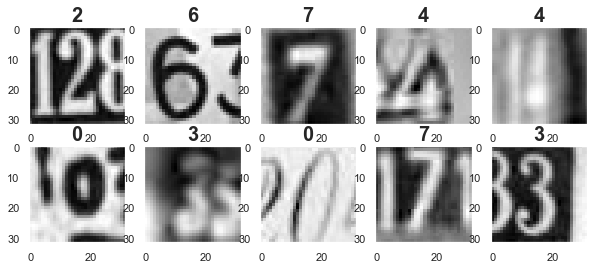

In [321]:
plot_images(X_train, y_train)

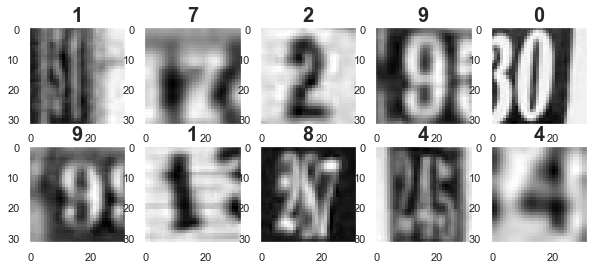

In [322]:
plot_images(X_test, y_test)

In [323]:
# Function to plot distribution of data

def plot_distribution(y1, y2, title1, title2):

    plt.rcParams['axes.facecolor'] = '#E6E6E6'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['grid.color'] = 'w'
    plt.rcParams['figure.figsize'] = (12, 4)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    fig.suptitle('Class Distribution', fontsize=15, fontweight='bold', y=1.05)

    ax1.bar(np.arange(10),np.bincount(y1))
    ax1.set_title(title1)
    ax1.set_xlim(-0.5, 9.5)
    ax1.set_xticks(np.arange(10))
    ax2.bar(np.arange(10),np.bincount(y2),color='coral')
    ax2.set_title(title2)

    fig.tight_layout()

In [324]:
# Plotting class distribution of training set and test set

plot_distribution(y_train, y_test, "Training set", "Test set")

In [325]:
# Splitting train set into train and validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

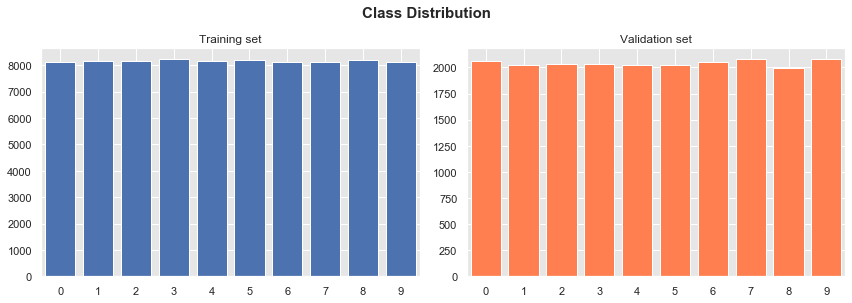

In [326]:
# Plotting class distribution of training set and validation set

plot_distribution(y_train, y_val, "Training set", "Validation set")

In [327]:
# Calculate the mean and the std on the training dataset

train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

Normalize images :

Normalization refers to normalizing the data dimensions so that they are of approximately the same scale. Divide each dimension by its standard deviation, once it has been zero-centered. alt text

In [328]:
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean)  / train_std
X_val = (X_val - train_mean) / train_std

In [329]:
plot_images(X_train, y_train)

In [330]:
# Fit the OneHotEncoder

enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

In [331]:
# Transform the label values to a one-hot-encoding scheme (ready for CNN)

y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

In [332]:
# Y shapes after OneHotEncoding

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

Training set (81600, 10)
Validation set (20400, 10)
Test set (18000, 10)


In [333]:
# Reshape X from 3 dimensions to 4 dimensions (ready for CNN)

X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)
X_val = X_val.reshape(-1,32,32,1)

### 4. Building, Training & Testing the model

In order to get more robust results out of our model, we are going to augment the images in the dataset, by randomly rotating them, zooming them in and out, shifting them up and down (IMPORTANT NOTE: It is best that we do not shift them horizontally, since there are also distracting digits in the images), shifting their channels and shearing them.

In [334]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [335]:
# Define CNN model

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    

    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    

    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=8)
optimizer = tensorflow.keras.optimizers.Adam(amsgrad=True)
model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In order to determine a good learning rate for the optimizer of our model (here, we use the AMSGrad variant of the Adam optimizer), we set a callback in an auxillary model which will gradually increase the learning rate of the optimizer.

In [336]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [337]:
# Fit model in order to determine best learning rate

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 256),
                              epochs = 50, validation_data = (X_val, y_val),
                              callbacks = [early_stopping, model_checkpoint])

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
319/319 [==============================] - 672s 2s/step - loss: 2.3993 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0991
Epoch 2/50
319/319 [==============================] - 638s 2s/step - loss: 2.2995 - accuracy: 0.1023 - val_loss: 1.9562 - val_accuracy: 0.2566
Epoch 3/50
319/319 [==============================] - 620s 2s/step - loss: 1.9514 - accuracy: 0.2595 - val_loss: 0.7016 - val_accuracy: 0.7831
Epoch 4/50
319/319 [==============================] - 618s 2s/step - loss: 1.1359 - accuracy: 0.5815 - val_loss: 0.3251 - val_accuracy: 0.9097
Epoch 5/50
319/319 [==============================] - 629s 2s/step - loss: 0.4692 - accuracy: 0.8615 - val_loss: 0.2477 - val_accuracy: 0.9380
Epoch 6/50
319/319 [==============================] - 619s 2s/step - loss: 0.3387 - accuracy: 0.9031 - val_loss: 0.2238 - val_accuracy: 0.9409
Epoch 7/50
319/319 [==============================] - 618s 2s/step - loss: 0.2914 - accuracy: 0.9178 - val_loss: 0.2036 - val_accuracy: 0.9475

### 5. Visualizations and insights

In [338]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [339]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [340]:
# Evaluate model on test set

test_loss, test_acc = model.evaluate(x = X_test, y = y_test, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.9845 
Test loss is: 0.0684


In [341]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

y_pred = enc.inverse_transform(y_pred)
y_train = enc.inverse_transform(y_train)

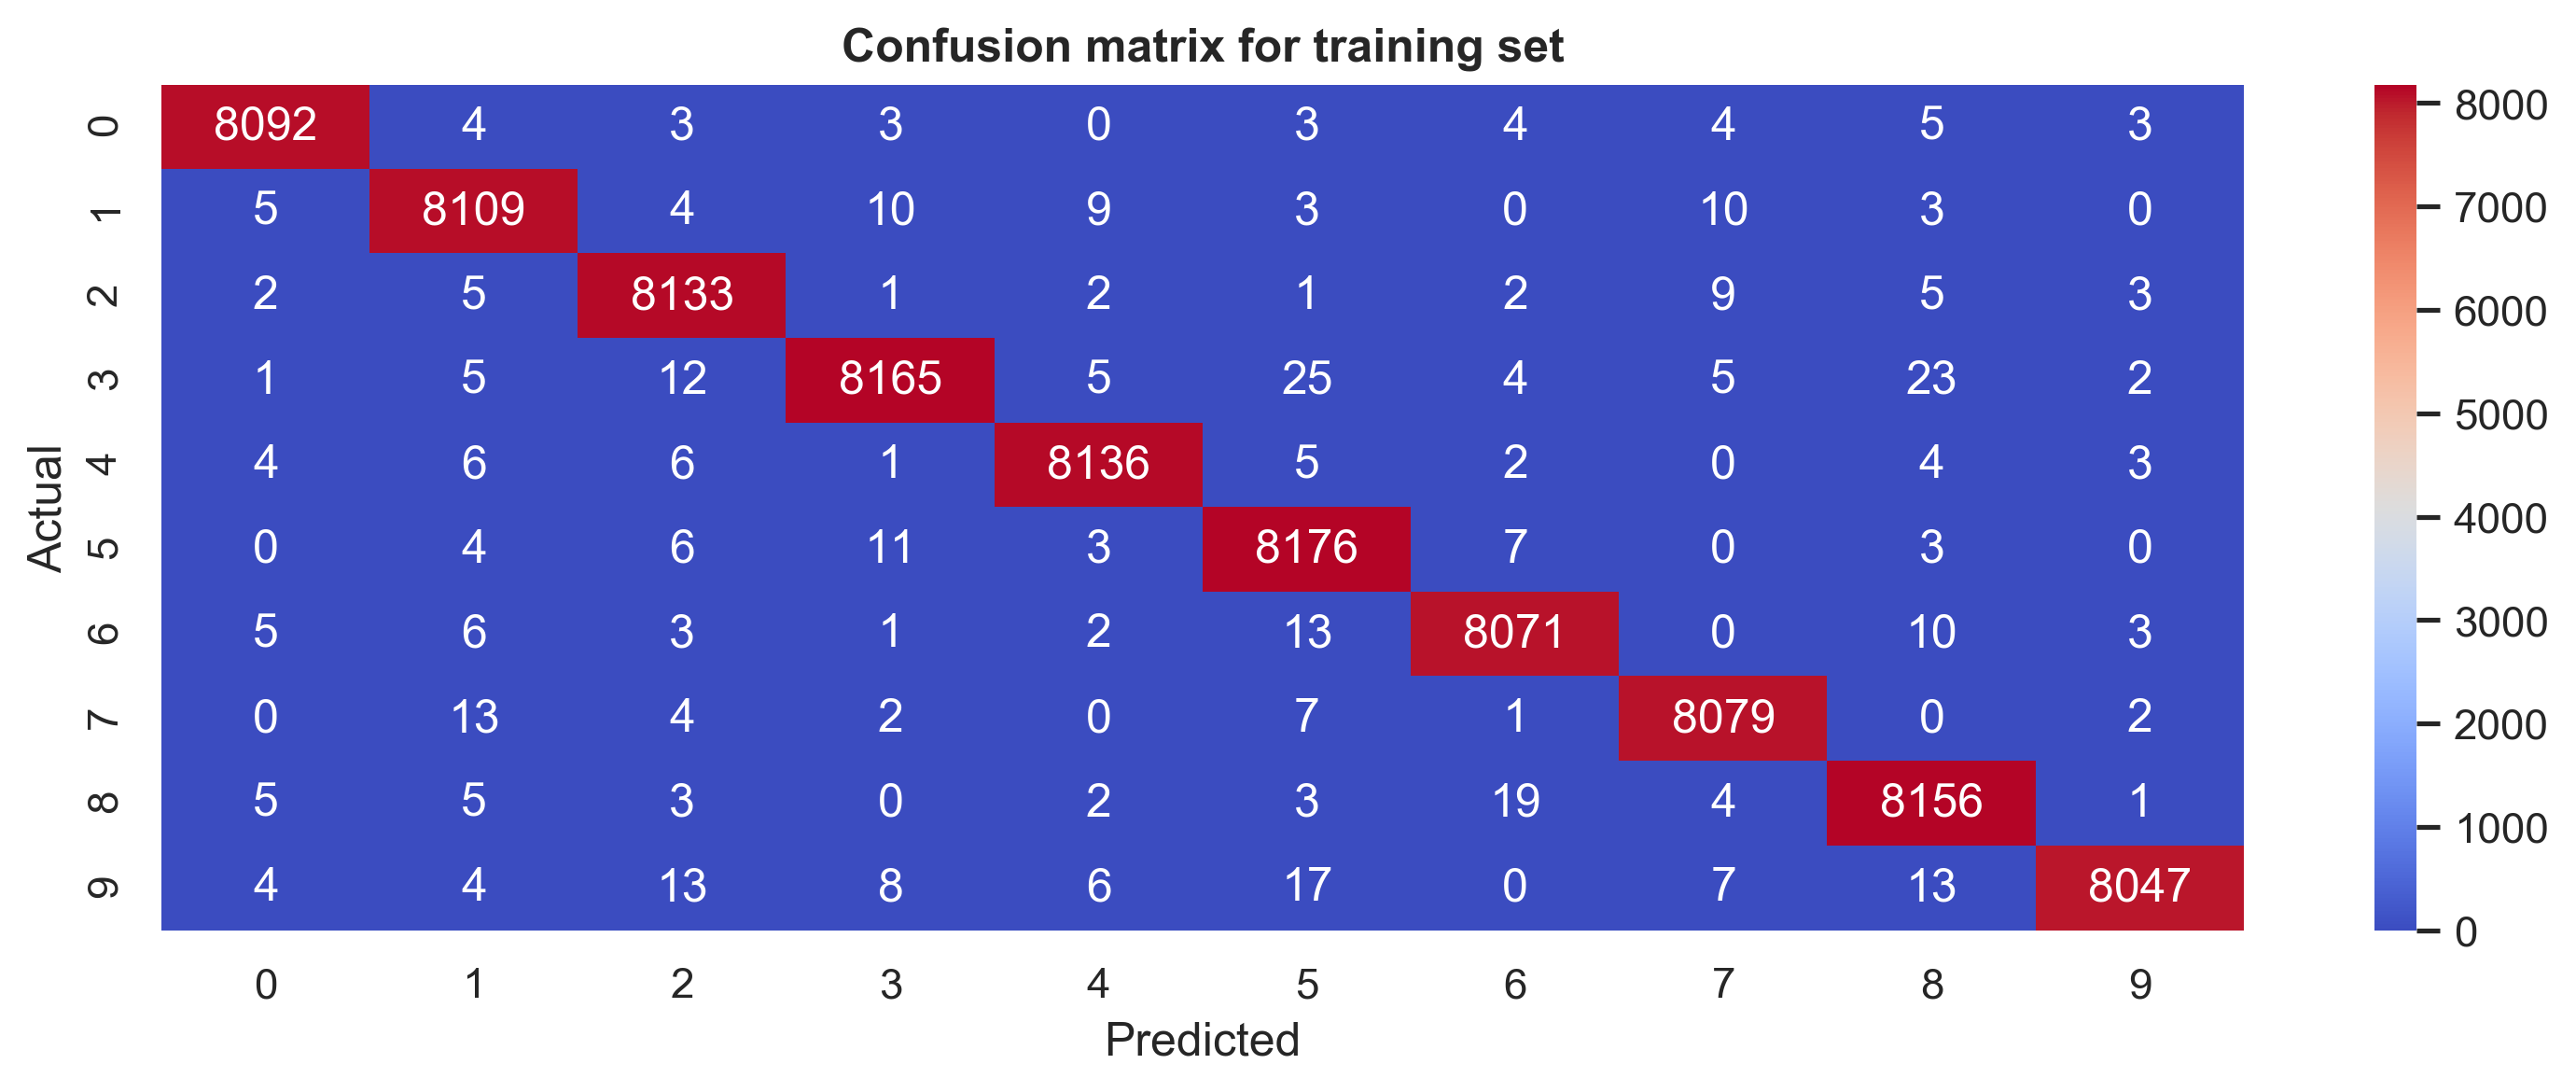

In [342]:
# Plot the confusion matrix for training set

plt.figure(dpi=300)
cm = confusion_matrix(y_train, y_pred)
plt.title('Confusion matrix for training set', weight='bold')
sns.heatmap(cm,annot=True,fmt='g',cmap='coolwarm',annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()